# Introduction to Linear Modeling in Python (Python)

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Introduction to Linear Modeling in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import random

In [3]:
# CHAPTER 1 - Exploring Linear Trends
from matplotlib.ticker import MultipleLocator

# CHAPTER 2 - Building Linear Models
import matplotlib
from statsmodels.formula.api import ols
from scipy import optimize

# CHAPTER 3 - Making Model Predictions
from sklearn.linear_model import LinearRegression

# CHAPTER 4 - Estimating Model Parameters


In [4]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Exploring Linear Trends

#### Exercício 1 - Introduction to Modeling Data

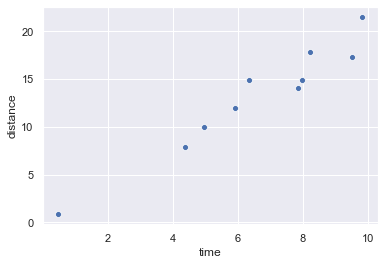

In [5]:
#vídeo

hiking = pd.read_csv(data_folder + "hiking_data.csv")

sns.scatterplot(hiking.sample(10, random_state=1)['time'], hiking.sample(10, random_state=1)['distance'])
plt.show()

# Interpolation & Extrapolation


Exercício 2

In [6]:
# Reasons for Modeling: Interpolation

distances = np.array(hiking.sample(10, random_state=1)['distance'])
times = np.array(hiking.sample(10, random_state=1)['time'])

# Compute the total change in distance and change in time
total_distance = np.max(distances) - np.min(distances)
total_time = np.max(times) - np.min(times)

# Estimate the slope of the data from the ratio of the changes
average_speed = total_distance / total_time

# Predict the distance traveled for a time not measured
elapse_time = 2.5
distance_traveled = average_speed * elapse_time
print("The distance traveled is {}".format(distance_traveled))


The distance traveled is 5.53250668170791


Exercício 3

In [7]:
# Reasons for Modeling: Extrapolation

def model(time, a0=0, a1=50):
    """For a given value of time, compute the model value for distance"""
    distance = a0 + (a1*time)
    return distance

# Select a time not measured.
time = 8

# Use the model to compute a predicted distance for that time.
distance = model(time)

# Inspect the value of the predicted distance traveled.
print(distance)

# Determine if you will make it without refueling.
answer = (distance <= 400)
print(answer)

400
True


Exercício 4

In [8]:
# Reasons for Modeling: Estimating Relationships

car1 = {'gallons': np.array([  0.03333333,   1.69666667,   3.36      ,   5.02333333,
          6.68666667,   8.35      ,  10.01333333,  11.67666667,
         13.34      ,  15.00333333,  16.66666667]),
 'miles': np.array([   1. ,   50.9,  100.8,  150.7,  200.6,  250.5,  300.4,  350.3,
         400.2,  450.1,  500. ])}

car2 = {'gallons': np.array([  0.02 ,   1.018,   2.016,   3.014,   4.012,   5.01 ,   6.008,
          7.006,   8.004,   9.002,  10.   ]),
 'miles': np.array([   1. ,   50.9,  100.8,  150.7,  200.6,  250.5,  300.4,  350.3,
         400.2,  450.1,  500. ])}

#################################################################


# Complete the function to model the efficiency.
def efficiency_model(miles, gallons):
    return np.mean( miles / gallons )

# Use the function to estimate the efficiency for each car.
car1['mpg'] = efficiency_model(car1['miles'] , car1['gallons'] )
car2['mpg'] = efficiency_model(car2['miles'] , car2['gallons'] )

# Finish the logic statement to compare the car efficiencies.
if car1['mpg'] > car2['mpg'] :
    print('car1 is the best')
elif car1['mpg'] < car2['mpg'] :
    print('car2 is the best')
else:
    print('the cars have the same efficiency')


car2 is the best


#### Exercício 5 - Visualizing linear relationships

In [9]:
#vídeo

# Quick plots
# Visualizing Linear Data (slope, intercept, etc)

Exercício 6

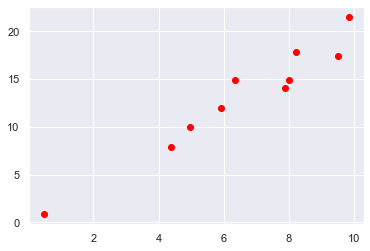

In [10]:
# Plotting the Data

# Create figure and axis objects using subplots()
fig, axis = plt.subplots()

# Plot line using the axis.plot() method
line = axis.plot(times , distances , linestyle=" ", marker="o", color="red")

# Use the plt.show() method to display the figure
plt.show()

Exercício 7

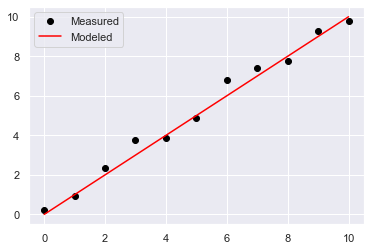

In [11]:
# Plotting the Model on the Data

measured_distances = np.array([ 0.24835708,  0.93086785,  2.32384427,  3.76151493,  3.88292331,
        4.88293152,  6.78960641,  7.38371736,  7.76526281,  9.27128002, 9.76829115])
times = np.array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

def model(x, y, a0=0, a1=1):
    """
    Purpose: 
        For a given data set, input as two arrays, x and y, compute the model value for all modeled values 'ym'
    Args:
        x (float, np.ndarray):
        y (float, np.ndarray): 
        a0 (float): default=0, coefficient for the Zeroth order term in the model, i.e. a0 + a1*x
        a1 (float): default=50, coefficient for the 1st order term in the model, i.e. a0 + a1*x
    Returns:
        ym (float, np.ndarray): model values corresponding to input x array, with the same length/size.
    """
    # Note to datacamp editors: the interface is intentionally like this for pedagogical reasons
    # we don't want the student believing that our model is just hard-coded ;-)
    # the student will call this function as "ym = model(x,y)" which will make more 
    # sense to them than "ym = model(x)"; they won't see the a0, a1, but we know 
    # they are their and it makes things more flexible for the teachers :)
    ym = a0 + (a1*x)
    return ym

######################################################################################################

# Pass times and measured distances into model
model_distances = model(times, measured_distances)

# Create figure and axis objects and call axis.plot() twice to plot data and model distances versus times
fig, axis = plt.subplots()
axis.plot(times, measured_distances, linestyle=" ", marker="o", color="black", label="Measured")
axis.plot(times, model_distances, linestyle="-", marker=None, color="red", label="Modeled")

# Add grid lines and a legend to your plot, and then show to display
axis.grid(True)
axis.legend(loc="best")
plt.show()


Exercício 8

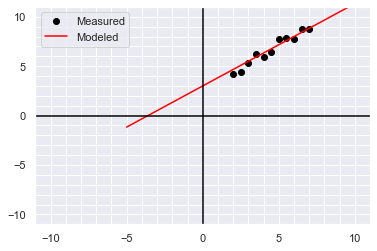

In [12]:
# Visually Estimating the Slope & Intercept

xd = np.array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ])
yd = np.array([ 4.24835708,  4.43086785,  5.32384427,  6.26151493,  5.88292331, 6.38293152,  7.78960641,  7.88371736,
               7.76526281, 8.77128002, 8.76829115])

from matplotlib.ticker import MultipleLocator

def plot_data_and_model(xd, yd, xm, ym):
    """
    Purpose:
        Plot both the measured data and the model o the same figure.
        Measured data will be black point markers with no line
        Modeled data will be a solid red line with no point markers
    Args:
        xd (np.ndarray): numpy array of indendent variable, measured data
        yd (np.ndarray): numpy array of dendent variable, measured data
        xm (np.ndarray): numpy array of indendent variable, model data
        ym (np.ndarray): numpy array of dendent variable, model data
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    fig, axis = plt.subplots()
    axis.plot(xd, yd, color="black", linestyle=" ", marker="o", label="Measured")
    axis.plot(xm, ym, color="red", linestyle="-", marker=None, label="Modeled")
    axis.axvline(0, color='black')
    axis.axhline(0, color='black')
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_xlim([-11, 11])
    axis.set_ylim([-11, 11])
    axis.grid(True, which="both")
    axis.legend(loc=2)
    return fig

def model(a0=2, a1=1):
    """
    Purpose: 
        For a given data set, input as two arrays, x and y, 
        compute the model value for all modeled values 'ym'
    Args:
        trial_intercept (float): default=0, coefficient for the Zeroth order term in the model, i.e. a0 + a1*x
        trial_slope (float): default=50, coefficient for the 1st order term in the model, i.e. a0 + a1*x
    Returns:
        xm (float, np.ndarray): model values for independent variable
        ym (float, np.ndarray): model values of depedent variable, with the same length/size as xm.
    """
    xm = np.linspace(-5, 15, 41)
    ym = a0 + (a1*xm)
    return xm, ym

###################################################################################################3

# Look at the plot data and guess initial trial values
trial_slope = 5 / 6
trial_intercept = 3

# input thoses guesses into the model function to compute the model values.
xm, ym = model(trial_intercept, trial_slope)

# Compare your your model to the data with the plot function
fig = plot_data_and_model(xd, yd, xm, ym)
plt.show()

# Repeat the steps above until your slope and intercept guess makes the model line up with the data.
final_slope = 5 / 6
final_intercept = 3


#### Exercício 9 - Quantify Linear Relationships

In [13]:
#vídeo   

# Review of Single Variable Statistics
# Covariance
# Correlation
# Normalization
# Magnitude versus Direction


Exercício 10

In [14]:
# Mean, Deviation, & Standard Deviation

x=[ 3.20141089,  3.57332076,  4.2284669 ,  4.27233051,  4.49370529,
        4.5713193 ,  4.74611933,  4.9143694 ,  5.06416613,  5.12046366,
        5.1332596 ,  5.1382451 ,  5.19463348,  5.30012277,  5.32111385,
        5.361098  ,  5.3622485 ,  5.42139975,  5.55601804,  5.56564872,
        5.57108737,  5.60910021,  5.74438063,  5.82636432,  5.85993128,
        5.90529103,  5.98816951,  6.00284592,  6.2829785 ,  6.28362732,
        6.33858905,  6.3861864 ,  6.41291216,  6.57380586,  6.68822271,
        6.73736858,  6.9071052 ,  6.92746243,  6.97873601,  6.99734545,
        7.0040539 ,  7.17582904,  7.26593626,  7.49073203,  7.49138963,
        7.65143654,  8.18678609,  8.20593008,  8.23814334,  8.39236527]
y=[ 146.48264883,  167.75876162,  229.73232314,  205.23686657,
        224.99693822,  239.79378267,  246.65838372,  264.14477475,
        268.91257002,  267.25180588,  248.54953839,  265.25831322,
        263.03153004,  251.08035094,  280.93733241,  276.53088378,
        268.59007072,  268.62252076,  265.21874   ,  280.37743899,
        283.47297931,  271.72788298,  299.42217399,  279.79758387,
        270.70401032,  306.18168601,  295.17313188,  298.81898515,
        305.35499931,  297.3187572 ,  330.10944498,  312.07619563,
        338.08560914,  337.16702908,  331.10617501,  325.46645358,
        337.66440893,  333.64162871,  370.85149057,  351.59390525,
        362.27985309,  345.48425572,  365.1976818 ,  386.90415177,
        371.05186831,  393.39852867,  397.95134137,  395.98005292,
        415.89087335,  415.63691073]
#################################################################################3

def plot_cdfs(dx, dy, zx, xy):
    array_index = list(range(len(x)))
    fig, axes = plt.subplots(nrows=2, ncols=1)
    axes[0].plot(array_index, dx, color="blue")
    axes[0].plot(array_index, dy, color="red")
    axes[0].set_ylabel("Deviations of X and Y")
    axes[1].plot(array_index, zx, color="blue")
    axes[1].plot(array_index, zy, color="red")
    axes[1].set_ylabel("Normalized Deviations of X and Y")
    axes[1].set_xlabel("Array Index")
    plt.subplots_adjust(left=0, bottom=-0.4, right=1.2, top=1, wspace=0, hspace=0.4)
    plt.show()


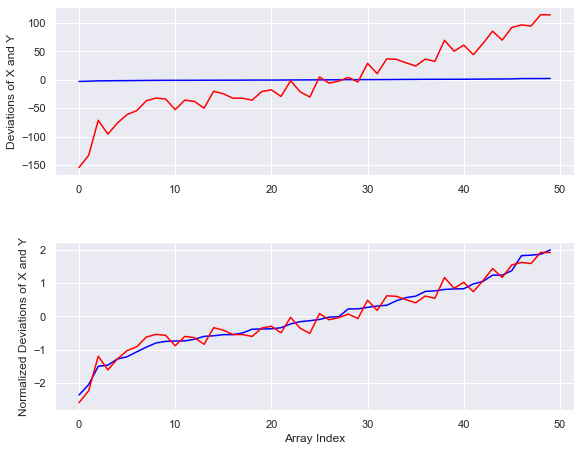

In [15]:
# Compute the deviations by subtracting the mean offset
dx = x - np.mean(x)
dy = y - np.mean(y)

# Normalize the data by dividing the deviations by the standard deviation
zx = dx / np.std(x)
zy = dy / np.std(y)

# Plot comparisons of the raw data and the normalized data
fig = plot_cdfs(dx, dy, zx, zy)

Exercício 11

Covariance:  69.67981827138166
Correlation:  0.9824333697735637


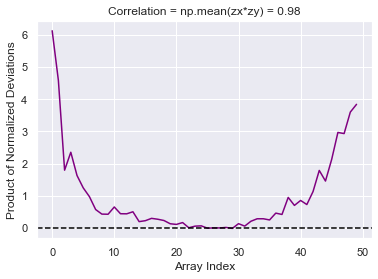

In [16]:
# Covariance vs Correlation

def plot_normalized_deviations(zx, zy):
    fig, axis = plt.subplots()
    lines = axis.plot(zx * zy, color="purple")
    axis.axhline(0, color="black", linestyle="--")
    axis.set_ylabel("Product of Normalized Deviations")
    axis.set_xlabel("Array Index")
    axis.set_title("Correlation = np.mean(zx*zy) = {:0.2f}".format(correlation))
    plt.show()
    return fig
##############################################

# Compute the covariance from the deviations.
dx = x - np.mean(x)
dy = y - np.mean(y)
covariance = np.mean(dx*dy)
print("Covariance: ", covariance)

# Compute the correlation from the normalized deviations.
zx = dx / np.std(x)
zy = dy / np.std(y)
correlation = np.mean(zx * zy)
print("Correlation: ", correlation)

# Plot the normalized deviations for visual inspection. 
fig = plot_normalized_deviations(zx, zy)


Exercício 12

In [17]:
# Correlation Strength

data_sets = {'A': {'correlation': np.nan,
  'x': np.array([ 2.55041235,  2.60839969,  2.79619981,  2.84385271,  3.15184751,
          3.21906477,  3.23462037,  3.33976744,  3.47394544,  3.56125803,
          3.67786134,  3.7339611 ,  3.86496991,  4.10019474,  4.24786673,
          4.24920164,  4.29714059,  4.31952159,  4.41315702,  4.41783781,
          4.42072788,  4.42420154,  4.62362038,  4.63538281,  4.70730828,
          4.7073288 ,  4.71777962,  4.82716962,  4.85543965,  4.98312847,
          5.08441026,  5.13865324,  5.21421035,  5.24607654,  5.26107949,
          5.30245284,  5.39280917,  5.42952286,  5.46962252,  5.62089269,
          5.67820005,  5.80961067,  5.92308322,  5.95929341,  6.02818114,
          6.32140278,  6.83206096,  6.90378732,  6.97401602,  7.31534773]),
  'y': np.array([  5.18184568,   5.12052882,   5.42316911,   5.84062449,
           6.5614449 ,   6.67094956,   6.25943637,   6.60223178,
           7.03070673,   7.36640234,   7.23592912,   7.42150745,
           7.45335607,   7.90133782,   8.69886493,   8.83746328,
           8.57627865,   8.88992641,   8.91672304,   8.67439568,
           8.93180467,   9.23291221,   9.23828425,   9.66192654,
           8.75968029,   9.62013323,   9.45732102,   9.57958741,
           9.73381949,   9.46936471,  10.11390254,  10.36658462,
          10.79789421,  10.36258554,  10.32003559,  10.47946642,
          11.01446886,  10.9412335 ,  10.80680499,  11.37010224,
          11.3806695 ,  11.86138259,  11.67065318,  11.83667129,
          11.95833524,  12.27692683,  13.73815199,  13.87283846,
          13.9493104 ,  14.57204868])},
 'B': {'correlation': np.nan,
  'x': np.array([ 2.19664381,  2.406278  ,  2.47343147,  2.72871597,  3.06636806,
          3.51128038,  3.87855402,  4.09926408,  4.18003832,  4.20434562,
          4.29194259,  4.41336839,  4.50269971,  4.58240329,  4.59650649,
          4.60918513,  4.74669209,  4.77111432,  4.82900646,  4.84738553,
          5.00264796,  5.01962047,  5.02286149,  5.04517742,  5.09524948,
          5.15589119,  5.24177672,  5.26908573,  5.30974025,  5.36136493,
          5.42179707,  5.50681676,  5.58929395,  5.69179864,  5.84444261,
          5.94426748,  6.05209339,  6.07448552,  6.07964661,  6.10895368,
          6.19165516,  6.23993253,  6.30742282,  6.30947322,  6.32371148,
          6.43754466,  6.64768944,  6.65144774,  6.79088371,  7.98870064]),
  'y': np.array([  7.75732279,  -0.97068431,  -0.66103018,   5.05375913,
           3.93976632,   6.44408273,   9.17318937,   8.05647607,
          10.62302986,  14.59132646,   4.68693984,   8.54535728,
          10.23727485,   8.33081153,  13.32821592,  -0.38344428,
          17.61579867,   4.97170349,  10.50554646,  12.51365356,
           6.86355506,  11.88747988,  12.86263588,  12.18438671,
           6.48548172,  18.34315419,  11.39140361,   5.92753502,
          13.14739828,  10.8807806 ,  12.70116343,  -3.24043311,
          16.46301037,  11.99411949,  12.34700338,  10.16815219,
          15.17366173,  16.0886504 ,  13.24263662,  17.78585212,
          12.70267957,  10.88000673,   8.5034434 ,  10.28007359,
          15.91379868,  12.5473011 ,  11.91631483,  15.41604806,
           9.30581229,  13.92987605])},
 'C': {'correlation': np.nan,
  'x': np.array([ 1.50176362,  1.96665095,  2.78558362,  2.84041313,  3.11713161,
          3.21414912,  3.43264917,  3.64296175,  3.83020766,  3.90057957,
          3.9165745 ,  3.92280638,  3.99329185,  4.12515346,  4.15139231,
          4.2013725 ,  4.20281062,  4.27674969,  4.44502255,  4.45706091,
          4.46385921,  4.51137526,  4.68047579,  4.7829554 ,  4.8249141 ,
          4.88161379,  4.98521188,  5.00355739,  5.35372312,  5.35453415,
          5.42323631,  5.482733  ,  5.5161402 ,  5.71725733,  5.86027839,
          5.92171072,  6.13388149,  6.15932804,  6.22342001,  6.24668181,
          6.25506737,  6.46978631,  6.58242032,  6.86341504,  6.86423703,
          7.06429567,  7.73348261,  7.7574126 ,  7.79767917,  7.99045658]),
  'y': np.array([-17.70183793, -12.68730947,  33.47056284,  -7.0881775 ,
           6.7091949 ,  23.53735376,  21.11660059,  35.3641024 ,
          31.59072152,  24.91144186,  -4.53019043,  20.56341545,
          13.01493562, -12.96994045,  30.97956936,  21.31852956,
           9.13346253,   4.82402639, -10.28277321,  12.10650699,
          16.42274434,  -4.27572923,  27.95621636,  -7.98933795,
         -24.3197774 ,  26.39886103,   3.51656715,   7.99064142,
          -2.69282132, -14.98633586,  30.93027062,  -0.05643774,
          37.60752021,  24.35144564,   6.68442643,  -5.53101698,
           0.5483712 ,  -7.08171402,  45.84065377,  15.1244233 ,
          30.91342343,  -7.33806017,  16.06140272,  32.57262109,
           8.36830187,  30.62642269,  -1.88612137,  -6.30071951,
          21.66576814,   9.91409021])}}

######################################################################################################


# Complete the function that will compute correlation.
def correlation(x,y):
    x_dev = x - np.mean(x)
    y_dev = y - np.mean(y)
    x_norm = x_dev / np.std(x)
    y_norm = y_dev / np.std(y)
    return np.mean(x_norm * y_norm)

# Compute and store the correlation for each data set in the list.
for name, data in data_sets.items():
    data['correlation'] = correlation(data['x'], data['y'])
    print('data set {} has correlation {:.2f}'.format(name, data['correlation']))

# Assign the data set with the best correlation.
best_data = data_sets['A']
print("\nThe data set with the best correlation is A")

data set A has correlation 1.00
data set B has correlation 0.54
data set C has correlation 0.09

The data set with the best correlation is A


# CHAPTER 2 - Building Linear Models

Here we look at the parts that go into building a linear model. Using the concept of a Taylor Series, we focus on the parameters slope and intercept, how they define the model, and how to interpret the them in several applied contexts. We apply a variety of python modules to find the model that best fits the data, by computing the optimal values of slope and intercept, using least-squares, numpy, statsmodels, and scikit-learn.

#### Exercício 1 - What makes a model linear

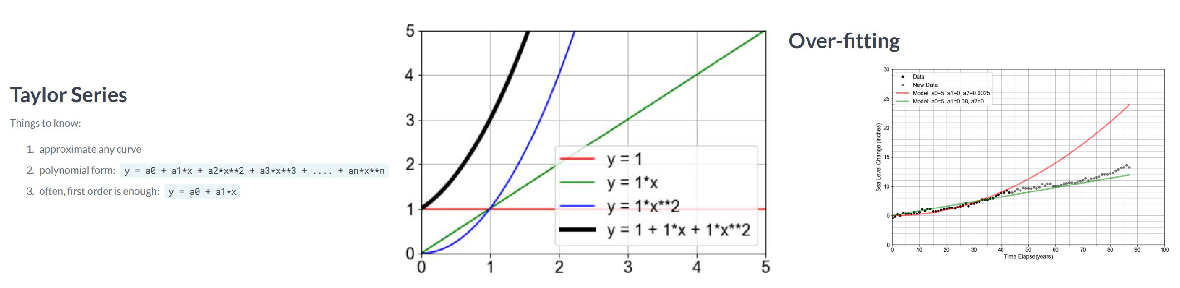

In [18]:
#vídeo
plot_3('taylor_series', 'polinomial', 'over-fitting')

Exercício 2

In [19]:
# Terms in a Model

import matplotlib

# plot_data_with_model function
def plot_data_with_model(a0=0, a1=0, a2=0, a3=0):
    xd, yd = load_data()
    xm, ym = model_data(a0, a1, a2, a3)
    font_options = {'family' : 'Arial', 'size'   : 16}
    matplotlib.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,6))
    axis.plot(xd, yd, color="black", linestyle=" ", marker="o", label='data')
    axis.plot(xm, ym, color="red", label='model')
    axis.grid(True, which='both')
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.set_ylim([-5*50, 20*50])
    axis.set_xlim([-10, 15])
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0*50))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0*50))
    axis.set_ylabel('Altitude (meters)')
    axis.set_xlabel('Step Distance (km)')
    title_txt = "Data with Model, a0 = {:0.2f}, a1 = {:0.2f}, a2 = {:0.2f}".format(a0, a1, a2)
    axis.set_title(title_txt)
    fig.tight_layout()
    plt.show()
    return fig

# plot_possible_answer function
def plot_possible_answer(answer="A"):
    """
    Purpose:
        Plot one of the possible answers to help you select the best one
        Don't forget to use plt.show() after calling this function
    Args:
        answer (str): the answer you want to see, e.g. 'A' for the first of 5 listed
    Returns:
        fig (matplotlib.figure): figure object of the plot generated by this funciton
        msg (str): helpful plot description that will guide you to victory
    """
    font_options = {'family': 'Arial', 'size': 16}
    matplotlib.rc('font', **font_options)
    msg = dict()
    msg["A"] = "Answer A"
    msg["B"] = "Answer B"
    msg["C"] = "Answer C"
    msg["D"] = "Answer D"
    msg["E"] = "Answer E"

    if answer == "A":
        terms = dict(a0=5*50, a1=0, a2=0, a3=0)
    elif answer == "B":
        terms = dict(a0=2*50, a1=4*50, a2=0, a3=0)
    elif answer == "C":
        terms = dict(a0=4*50, a1=1.5*50, a2=0, a3=0)
    elif answer == "D":
        terms = dict(a0=2*50, a1=1.5*50, a2=0.0, a3=0)
    elif answer == "E":
        terms = dict(a0=2*50, a1=1*50, a2=0.065*50, a3=0)
    else:
        print("Invalid answer choice! Try A, B, C, D, or E")

    fig = plot_data_with_model(**terms)
    plt.show()
    return fig, msg[answer]

# load_data function
def load_data(num_pts=21, a0=2*50, a1=50*3/2, mu=0, sigma=1, ae=0.5*50, seed=1234):
    """
    Purpose: 
        Procedural generation of data for exercise, using a linear model
        plus some random (gaussian) noise
    Args:
        num_pts (int): number of data points
        a0 (float): coefficient for the Zeroth order term in the model, i.e. a0 + a1*x
        a1 (float): coefficient for the 1st order term in the model, i.e. a0 + a1*x
        mu (float): mean of the random variable used to give the data some noise
        sigma (float): stdard deviation of the random variable used to give the data some noise
        ae (float): amplitude of the random noise added to the linear generation of data
        seed (int): seed for random number generator so the data is reproducible
    Returns:
        x (np.ndarray): numpy array of indendent variable
        y (np.ndarray): numpy array of dendent variable
    """
    np.random.seed(seed)
    xmin = 0
    xmax = 10
    x = np.linspace(xmin, xmax, num_pts)
    e = np.array([np.random.normal(mu, sigma) for n in range(num_pts)])
    y = a0 + (a1*x) + ae*e
    return x, y

# model_data function
def model_data(a0=2*50, a1=1*50, a2=0, a3=0):
    x = np.linspace(-20, 20, 201)
    y = a0 + (a1*x) + (a2*x*x) + (a3*x*x*x)
    return x, y


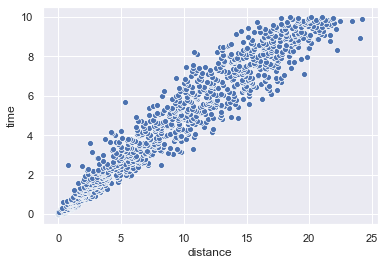

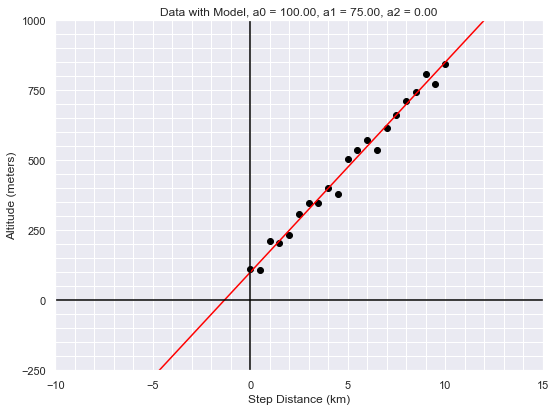

D) y = 100 + 75x


In [20]:
sns.scatterplot(hiking['distance'], hiking['time'])

plot_possible_answer(answer="D")
plt.show()

print("D) y = 100 + 75x")

Exercício 3

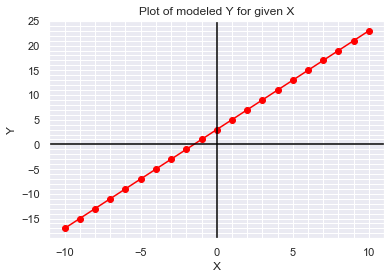

In [21]:
# Model Components

# plot_prediciton function
def plot_prediction(x, y):
    """
    Purpose:
        Create a plot of y versus x
    Args:
        x (np.array): array of values for the indepent variable, e.g. times
        y (np.array): array of values for the depedent variable, e.g. distances
    Returns:
        fig (matplotlib.figure): matplotlib figure object
    """
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots()
    axis.plot(x, y, color="red", linestyle="-", marker="o")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_ylabel('Y')
    axis.set_xlabel('X')
    axis.set_title("Plot of modeled Y for given X")
    plt.show()
    return fig
###############################################################################################3

# Define the general model as a function
def model(x, a0=3, a1=2, a2=0):
    return a0 + (a1*x) + (a2*x*x)

# Generate array x, then predict y values for specific, non-default a0 and a1
x = np.linspace(-10, 10, 21)
y = model(x)

# Plot the results, y versus x
fig = plot_prediction(x, y)


Exercício 4

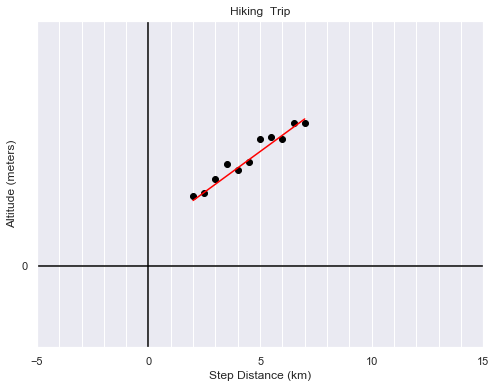

In [22]:
# Model Parameters

def model(x, a0=1, a1=1, a2=0):
    y = a0 + (a1*x) + (a2*x*x)
    return y

def plot_data(x, y):
    """
    Purpose:
        Create a plot of y versus x
    Args:
        x (np.array): array of values for the indepent variable, e.g. times
        y (np.array): array of values for the depedent variable, e.g. distances
    Returns:
        fig (matplotlib.figure): matplotlib figure object
    """
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,6))
    axis.plot(x, y, color="black", linestyle=" ", marker="o")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.set_ylim([-5*1, 15*1])
    axis.set_xlim([-5, 15])
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0*50))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0*50))
    axis.set_ylabel('Altitude (meters)')
    axis.set_xlabel('Step Distance (km)')
    axis.set_title("Hiking  Trip")
    return fig
###########################################################################################

# Complete the plotting function definition
def plot_data_with_model(xd, yd, ym):
    fig = plot_data(xd, yd)  # plot measured data
    fig.axes[0].plot(xd, ym, color='red')  # over-plot modeled data
    plt.show()
    return fig

# Select new model parameters a0, a1, and generate modeled `ym` from them.
a0 = 2
a1 = 1
ym = model(xd, a0, a1)

# Plot the resulting model to see whether it fits the data
fig = plot_data_with_model(xd, yd, ym)


#### Exercício 5 - Interpreting slope and coefficient

In [23]:
#vídeo

Exercício 6

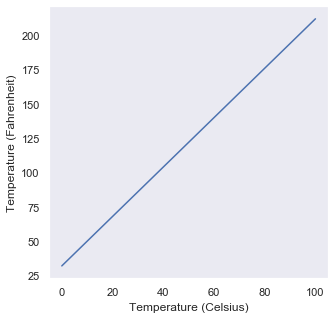

In [24]:
# Linear Proportionality

def plot_temperatures(temps_C, temps_F):
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(5, 5))
    axis.plot(temps_C, temps_F)
    axis.set_xlabel("Temperature (Celsius)")
    axis.set_ylabel("Temperature (Fahrenheit)")
    axis.grid()
    plt.show()
    return fig
#######################################################################

# Complete the function to convert C to F
def convert_scale(temps_C):
    (freeze_C, boil_C) = (0, 100)
    (freeze_F, boil_F) = (32, 212)
    change_in_C = boil_C - freeze_C
    change_in_F = boil_F - freeze_F
    slope = change_in_F / change_in_C
    intercept = freeze_F - freeze_C
    temps_F = 32 + (1.8 * temps_C)
    return temps_F

# Use the convert function to compute values of F and plot them
temps_C = np.linspace(0, 100, 101)
temps_F = convert_scale(temps_C)
fig = plot_temperatures(temps_C, temps_F)


Exercício 7

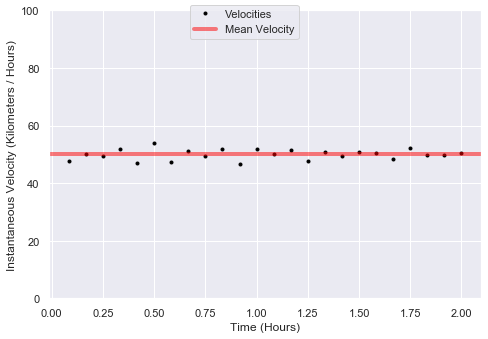

In [25]:
# Slope and Rates-of-Change

# In this exercise, you will model the motion of a car driving (roughly) constant velocity by computing the average 
# velocity over the entire trip. The linear relationship modeled is between the time elapsed and the distance traveled.

def plot_velocity_timeseries(times, velocities):
    fig, axis = plt.subplots()
    axis.plot(times, velocities, linestyle=" ", marker=".", color='black', label='Velocities')
    axis.axhline(np.mean(velocities), color='red', alpha=0.5, lw=4, label='Mean Velocity')
    axis.grid(True, which="both")
    axis.set_ylabel("Instantaneous Velocity (Kilometers / Hours)")
    axis.set_xlabel("Time (Hours)")
    axis.set_ylim([0, 100])
    fig.tight_layout()
    fig.legend(loc='upper center')
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.4)
    plt.show()
    return fig

times = np.array([ 0.        ,  0.08333333,  0.16666667,  0.25      ,  0.33333333,
        0.41666667,  0.5       ,  0.58333333,  0.66666667,  0.75      ,
        0.83333333,  0.91666667,  1.        ,  1.08333333,  1.16666667,
        1.25      ,  1.33333333,  1.41666667,  1.5       ,  1.58333333,
        1.66666667,  1.75      ,  1.83333333,  1.91666667,  2.        ])

distances = np.array([   0.13536211,    4.11568697,    8.28931902,   12.41058595,
         16.73878397,   20.64153844,   25.14540098,   29.10323276,
         33.35991992,   37.47921914,   41.78850899,   45.66165494,
         49.9731319 ,   54.13466214,   58.42781412,   62.40834239,
         66.65229765,   70.76017847,   75.00351781,   79.2152346 ,
         83.24161507,   87.59539364,   91.74179923,   95.87520786,
        100.07507133])

#######

# Compute an array of velocities as the slope between each point
diff_distances = np.diff(distances)
diff_times = np.diff(times)
velocities = diff_distances / diff_times

# Chracterize the center and spread of the velocities
v_avg = np.mean(velocities)
v_max = np.max(velocities)
v_min = np.min(velocities)
v_range = v_max - v_min

# Plot the distribution of velocities
fig = plot_velocity_timeseries(times[1:], velocities)


Exercício 8

In [26]:
# Intercept and Starting Points

solution = pd.read_csv(data_folder + "solution_data.csv", comment="#")
df = solution.copy()

# Import ols from statsmodels, and fit a model to the data
from statsmodels.formula.api import ols

model_fit = ols(formula="masses ~ volumes", data=df)
model_fit = model_fit.fit()

# Extract the model parameter values, and assign them to a0, a1
a0 = model_fit.params['Intercept']
a1 = model_fit.params['volumes']

# Print model parameter values with meaningful names, and compare to summary()
print( "container_mass   = {:0.4f}".format(a0) )
print( "solution_density = {:0.4f}".format(a1) )
print( model_fit.summary() )


container_mass   = 5.4349
solution_density = 1.1029
                            OLS Regression Results                            
Dep. Variable:                 masses   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.328e+05
Date:                Thu, 13 Feb 2020   Prob (F-statistic):          1.19e-156
Time:                        16:52:52   Log-Likelihood:                 102.39
No. Observations:                 101   AIC:                            -200.8
Df Residuals:                      99   BIC:                            -195.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


#### Exercício 9 - Model Optimization

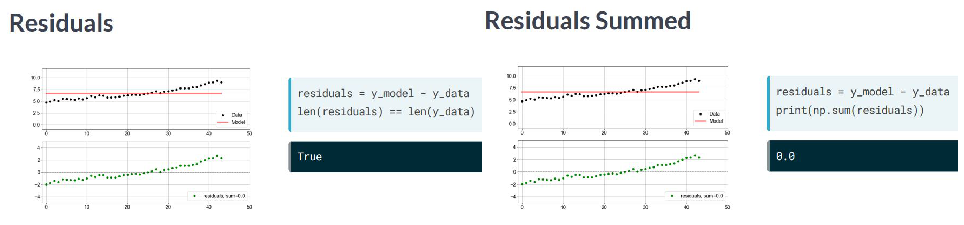

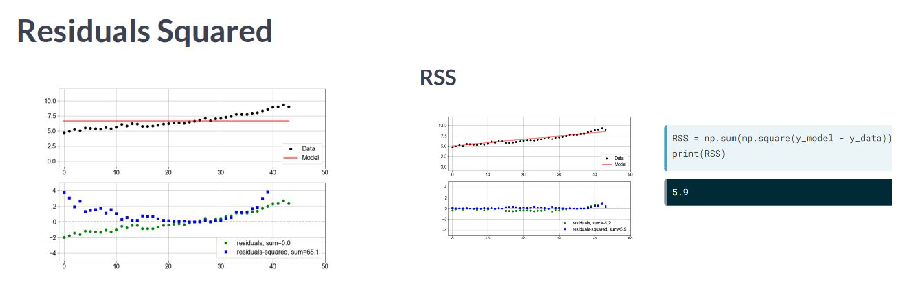

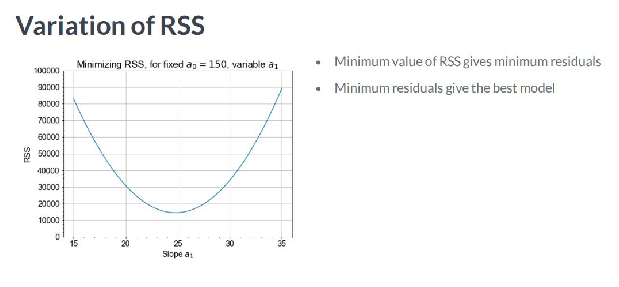

In [27]:
#vídeo

plot_2('residuals', 'residuals_summed'); plot_2('residuals_squared','rss'); plot_1('rss_variation', right=1.4)

Exercício 10

In [28]:
# Residual Sum of the Squares

# Load the data
x_data, y_data = load_data()

# Model the data with specified values for parameters a0, a1
y_model = model(x_data, a0=150, a1=25)

# Compute the RSS value for this parameterization of the model
rss = np.sum(np.square(y_data - y_model))
print("RSS = {}".format(rss))


RSS = 1321268.1876465147


Exercício 11

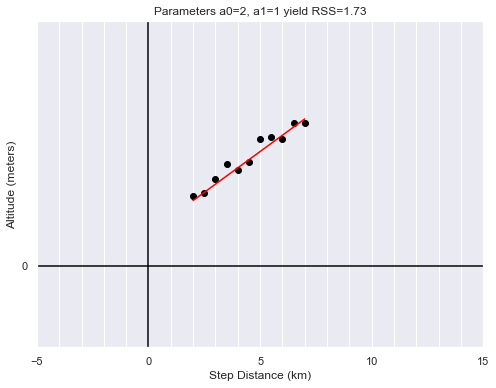

Parameters a0=2, a1=1 yield RSS=1.73


In [29]:
# Minimizing the Residuals

def plot_data_with_model(xd, yd, ym, title):
    fig = plot_data(xd, yd)
    fig.axes[0].plot(xd, ym, color="red")
    fig.axes[0].set_title(title)
    plt.show()
    return fig
###########################

# Complete function to load data, build model, compute RSS, and plot
def compute_rss_and_plot_fit(a0, a1):
    #xd, yd = load_data()
    ym = model(xd, a0, a1)
    residuals = ym - yd
    rss = np.sum(np.square(residuals))
    summary = "Parameters a0={}, a1={} yield RSS={:0.2f}".format(a0, a1, rss)
    fig = plot_data_with_model(xd, yd, ym, summary)
    return rss, summary

# Chose model parameter values and pass them into RSS function
rss, summary = compute_rss_and_plot_fit(a0=2, a1=1)
print(summary)

Exercício 12

The minimum RSS = 27300.670955073878, came from a1 = [67.5]


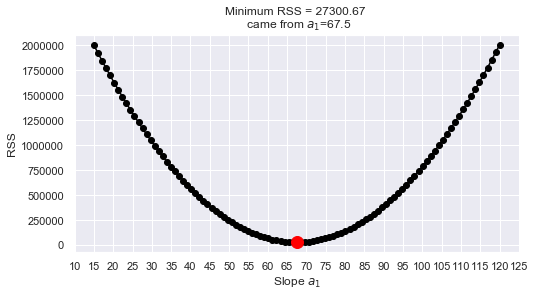

In [30]:
# Visualizing the RSS Minima

def plot_rss_vs_a1(a1_array, rss_array):
    """
    Purpose:
        Plot RSS values (y-axis) versus a1 parameters values (x-axis)
         Also plot a point where the minimum RSS value occurs, and the 
         corresponding a1 value whose model resulted in that minimum RSS.
    Args:
        a1_array (np.array): an array of trial values for a1 (model slope)
        rss_array (np.array): an array of computed RSS values resulting from the a1_array
    Returns:
        fig (matplotlib.figure): figure object on which the data is plotted
    """
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8, 4))
    min_rss = np.min(rss_array) 
    best_slope = a1_array[np.where(rss_array==min_rss)]
    axis.plot(a1_array, rss_array, marker="o", color='black')
    axis.plot(best_slope, min_rss, marker="o", markersize=12, linestyle=" ", color='red')
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.grid(True, which="major")
    axis.set_ylabel("RSS")
    axis.set_xlabel("Slope $a_1$")
    #axis.set_ylim([0, 100000])
    axis.set_title("Minimum RSS = {:.02f} \n came from $a_1$={}".format(min_rss, best_slope[0]))
    plt.show()
    return fig

def compute_rss(yd, ym):
    rss = np.sum(np.square(yd - ym))
    return rss

###########################################################################################

rss_list = []

# Loop over all trial values in a1_array, computing rss for each
a1_array = np.linspace(15, 120, 101)
for a1_trial in a1_array:
    y_model = model(x_data, a0=150, a1=a1_trial)
    rss_value = compute_rss(y_data, y_model)
    rss_list.append(rss_value)

# Find the minimum RSS and the a1 value from whence it came
rss_array = np.array(rss_list)
best_rss = np.min(rss_array) 
best_a1 = a1_array[np.where(rss_array==best_rss)]
print('The minimum RSS = {}, came from a1 = {}'.format(best_rss, best_a1))

# Plot your rss and a1 values to confirm answer
fig = plot_rss_vs_a1(a1_array, rss_array)
 

#### Exercício 13 - Least-Squares Optimization

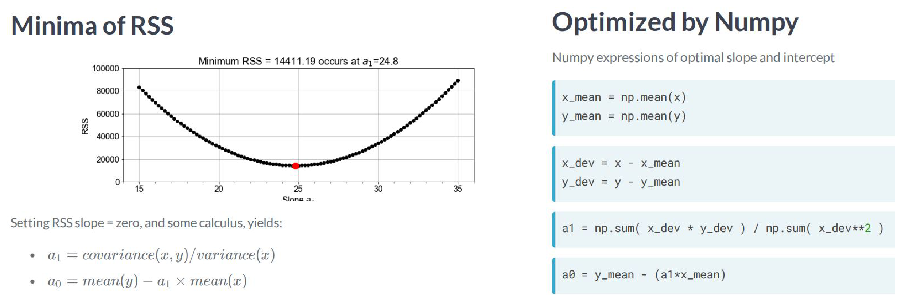

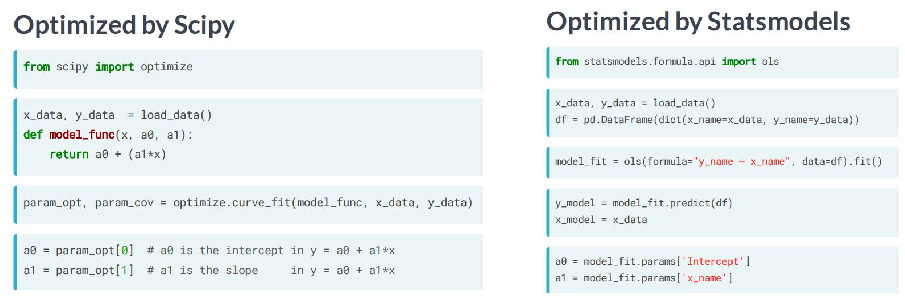

In [31]:
#vídeo

plot_2('rss_minima', 'optimized_numpy'); print("="*120); plot_2('optimized_scipy', 'optimized_statsmodels')

Exercício 14

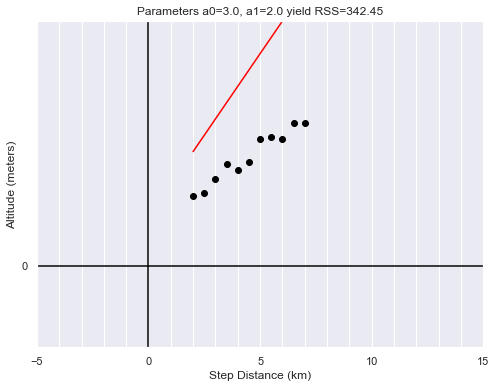

In [32]:
# Least-Squares with `numpy`

# prepare the means and deviations of the two variables
x_mean = np.mean(x)
y_mean = np.mean(y)
x_dev = x - x_mean
y_dev = y - y_mean

# Complete least-squares formulae to find the optimal a0, a1
a1 = np.sum(x_dev * y_dev) / np.sum( np.square(x_dev) )
a0 = y_mean - (a1 * x_mean)

# Use the those optimal model parameters a0, a1 to build a model
y_model = model(x, a0, a1)

# plot to verify that the resulting y_model best fits the data y
fig, rss = compute_rss_and_plot_fit(a0, a1)


Exercício 15

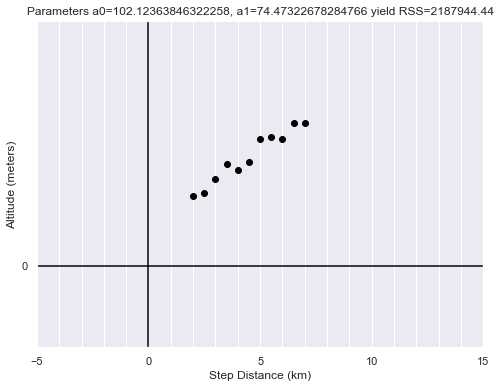

In [33]:
# Optimization with Scipy

# Define a model function needed as input to scipy
def model_func(x, a0, a1):
    return a0 + (a1*x)

# Load the measured data you want to model
x_data, y_data  = load_data()

# call curve_fit, passing in the model function and data; then unpack the results
param_opt, param_cov = optimize.curve_fit(model_func, x_data, y_data)

a0 = param_opt[0]  # a0 is the intercept in y = a0 + a1*x
a1 = param_opt[1]  # a1 is the slope     in y = a0 + a1*x

# test that these parameters result in a model that fits the data
fig, rss = compute_rss_and_plot_fit(a0, a1)


Exercício 16 

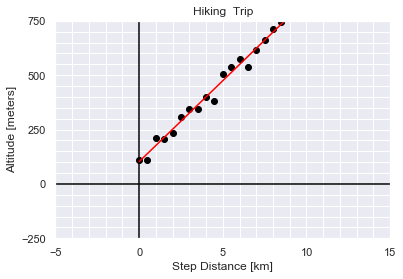

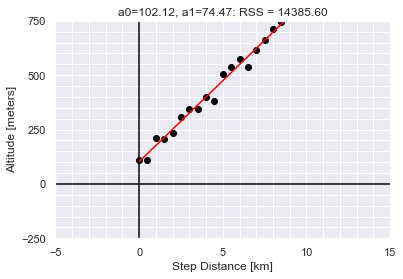

In [34]:
# Least-Squares with `statsmodels`

df = pd.DataFrame(dict(x_column=x_data, y_column=y_data))

def plot_data(x, y):
    fig, axis = plt.subplots()
    axis.plot(x, y, color="black", linestyle=" ", marker="o")
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.set_ylim([-5*50, 15*50])
    axis.set_xlim([-5, 15])
    axis.xaxis.set_major_locator(MultipleLocator(5.0))
    axis.xaxis.set_minor_locator(MultipleLocator(1.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0*50))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0*50))
    axis.set_ylabel('Altitude [meters]')
    axis.set_xlabel('Step Distance [km]')
    axis.set_title("Hiking  Trip")
    return fig

def plot_data_with_model(x, y, ym):
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig = plot_data(x, y)
    fig.axes[0].plot(x, ym, color="red")
    return fig

def compute_rss_and_plot_fit(a0=3*50, a1=0.5*50):
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    xd, yd = load_data()
    ym = model(xd, a0, a1)
    rss = compute_rss(yd, ym)
    fig = plot_data_with_model(xd, yd, ym)
    title_text="a0={:0.2f}, a1={:0.2f}: RSS = {:0.2f}".format(a0, a1, rss)
    fig.axes[0].set_title(title_text)
    plt.show()
    return fig, rss

##############################################################################################


# Pass data and `formula` into ols(), use and `.fit()` the model to the data
model_fit = ols(formula="y_column ~ x_column", data=df).fit()

# Use .predict(df) to get y_model values, then over-plot y_data with y_model
y_model = model_fit.predict(df)
fig = plot_data_with_model(x_data, y_data, y_model)

# Extract the a0, a1 values from model_fit.params
a0 = model_fit.params['Intercept']
a1 = model_fit.params['x_column']

# Visually verify that these parameters a0, a1 give the minimum RSS
fig, rss = compute_rss_and_plot_fit(a0, a1)


# CHAPTER 3 - Making Model Predictions

Next we will apply models to real data and make predictions. We will explore some of the most common pit-falls and limitations of predictions, and we evaluate and compare models by quantifying and contrasting several measures of goodness-of-fit, including RMSE and R-squared.

#### Exercício 1 - Modeling real data

In [35]:
#vídeo

Exercício 2

In [36]:
# Linear Model in Anthropology

# If you found part of a skeleton, from an adult human that lived thousands of years ago, how could you estimate the height
# of the person that it came from? This exercise is in part inspired by the work of forensic anthropologist Mildred Trotter,
# who built a regression model for the calculation of stature estimates from human "long bones" or femurs that is commonly 
# used today.

femur_data = pd.read_csv(data_folder + "femur_data.csv")
legs = femur_data['length'].values
heights = femur_data['height'].values

# import the sklearn class LinearRegression and initialize the model
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)

# Prepare the measured data arrays and fit the model to them
legs = legs.reshape(len(legs),1)
heights = heights.reshape(len(heights),1)
model.fit(legs, heights)

# Use the fitted model to make a prediction for the found femur
fossil_leg = np.array([[50.7]])
fossil_height = model.predict(fossil_leg)

print("Predicted fossil height = {:0.2f} cm\n".format(fossil_height[0, 0]))
femur_data.head()

Predicted fossil height = 181.34 cm



length      height
0    35.0  145.751662
1    36.5  154.819895
2    38.0  147.451499
3    39.5  154.532704
4    41.0  166.174503

Exercício 3

In [37]:
# Linear Model in Oceanography

# Time-series data provides a context in which the "slope" of the linear model represents a "rate-of-change".
# In this exercise, you will use measurements of sea level change from 1970 to 2010, build a linear model of that 
# changing sea level and use it to make a prediction about the future sea level rise.

sea_level_data = pd.read_csv(data_folder + "sea_level_data.csv", comment="#")
years = sea_level_data['year'].values.reshape(-1, 1)
levels = sea_level_data['sea_level_inches'].values.reshape(-1, 1)

def plot_data_and_forecast(years, levels, years_forecast, levels_forecast):
    """
    Purpose:
        Over-plot the forecast data with the measured data used to fit the model
    Args:
        years (np.array): independent ("x") variable of measured data set
        levels (np.array): dependent ("y") variable of measured data set
        years_forecast (np.array): independent ("x") variable of forecast/modeled data
        levels_forecast (np.array): dependent ("y") variable of forecast/modeled data
    Returns:
        fig (matplotlib.figure): matplotlib figure object containing the plot
    """
    font_options = {'family': 'Arial', 'size': 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(10, 6))
    axis.plot(years, levels, color="black", linestyle=" ", marker="o", label='Data')
    axis.plot(years_forecast, levels_forecast, marker=".", color="red", label='Forecast')
    axis.grid(True, which="both")
    axis.axhline(0, color="black")
    axis.axvline(0, color="black")
    axis.xaxis.set_major_locator(MultipleLocator(50.0))
    axis.xaxis.set_minor_locator(MultipleLocator(10.0))
    axis.yaxis.set_major_locator(MultipleLocator(5.0))
    axis.yaxis.set_minor_locator(MultipleLocator(1.0))
    axis.set_ylim([0, 20])
    axis.set_xlim([1965, 2105])
    axis.set_ylabel('Sea Level Change (inches)')
    axis.set_xlabel('Time (years)')
    axis.set_title("Global Average Sea Level Change")
    axis.legend()
    plt.show()
    return fig

sea_level_data.head()

year  sea_level_inches
0  1970          4.677165
1  1971          4.881890
2  1972          5.240157
3  1973          5.003937
4  1974          5.472441

Prediction: year = 2100, level = 16.66


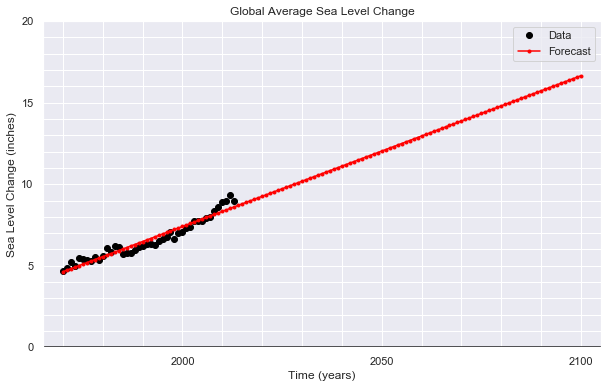

In [38]:
# Import LinearRegression class, build a model, fit to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(years, levels)

# Use model to make a prediction for one year, 2100
future_year = [[2100]]
future_level = model.predict(future_year)
print("Prediction: year = {}, level = {:.02f}".format(future_year[0][0], future_level[0,0]))

# Use model to predict for many years, and over-plot with measured data
years_forecast = np.linspace(1970, 2100, 131).reshape(-1, 1)
levels_forecast = model.predict(years_forecast)

fig = plot_data_and_forecast(years, levels, years_forecast, levels_forecast)

Exercício 4

In [39]:
# Linear Model in Cosmology

hubble_data = pd.read_csv(data_folder + "hubble_data.csv", comment="#")
hubble_data.head()

names  distances  velocities
0      SMC      0.032         170
1      LMC      0.034         290
2  NGC-221      0.275        -185
3  NGC-224      0.275        -220
4  NGC-598      0.263         -70

In [40]:
df = hubble_data.copy()

# Fit the model, based on the form of the formula
model_fit = ols(formula="velocities ~ distances", data=df).fit()

# Extract the model parameters and associated "errors" or uncertainties
a0 = model_fit.params['Intercept']
a1 = model_fit.params['distances']
e0 = model_fit.bse['Intercept']
e1 = model_fit.bse['distances']

# Print the results
print('For slope a1={:.02f}, the uncertainty in a1 is {:.02f}'.format(a1, e1))
print('For intercept a0={:.02f}, the uncertainty in a0 is {:.02f}'.format(a0, e0))

For slope a1=454.16, the uncertainty in a1 is 75.24
For intercept a0=-40.78, the uncertainty in a0 is 83.44


#### Exercício 5 - The limits of Prediction

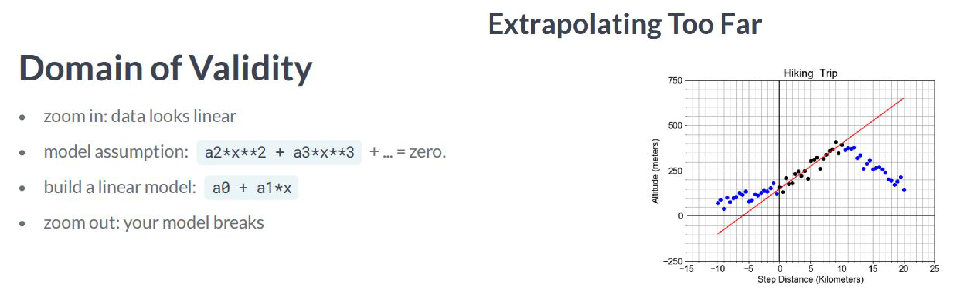

In [41]:
#vídeo
plot_2('domain_validity', 'extrapolating_too_far')

Exercício 6

In [42]:
%%script false
# Interpolation: Inbetween Times

# build and fit a model to the df_monthly data
model_fit = ols('Close ~ DayCount', data=df_monthly).fit()

# Use the model FIT to the MONTHLY data to make a predictions for both monthly and daily data
df_monthly['Model'] = model_fit.predict(df_monthly.DayCount)
df_daily['Model'] = model_fit.predict(df_daily.DayCount)

# Plot the monthly and daily data and model, compare the RSS values seen on the figures
fig_monthly = plot_model_with_data(df_monthly)
fig_daily = plot_model_with_data(df_daily)

Couldn't find program: 'false'


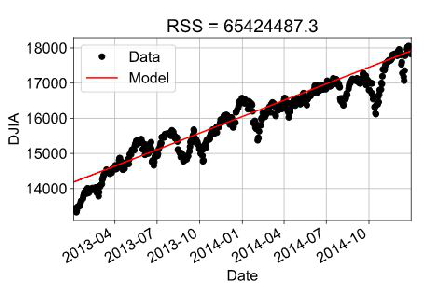

Notice the monthly data looked linear, but the daily data clearly has additional, nonlinear trends. Under-sampled 
data often misses real-world features in the data on smaller time or spatial scales. Using the model from the under-sampled
data to make interpolations to the daily data can result is large residuals. Notice that the RSS value for the daily plot
is more than 30 times worse than the monthly plot


In [43]:
plot_1('ex_6')
print("""Notice the monthly data looked linear, but the daily data clearly has additional, nonlinear trends. Under-sampled 
data often misses real-world features in the data on smaller time or spatial scales. Using the model from the under-sampled
data to make interpolations to the daily data can result is large residuals. Notice that the RSS value for the daily plot
is more than 30 times worse than the monthly plot""")

Exercício 7

In [44]:
%%script false
# Extrapolation: Going Over the Edge

# Compute the residuals, "data - model", and determine where [residuals < tolerance]
residuals = np.abs(y_data - y_model)
tolerance = 100
x_good = x_data[residuals < tolerance]

# Find the min and max of the "good" values, and plot y_data, y_model, and the tolerance range
print('Minimum good x value = {}'.format(np.min(x_good)))
print('Maximum good x value = {}'.format(np.max(x_good)))
fig = plot_data_model_tolerance(x_data, y_data, y_model, tolerance)

Couldn't find program: 'false'


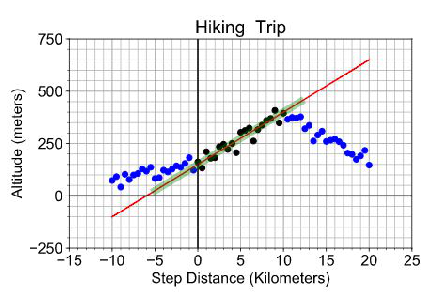

Notice the range of good values, which extends a little out into the new data, is marked in green on the plot.
By comparing the residuals to a tolerance threshold, we can quantify how far out out extrapolation can go before the 
difference between model and data gets too large.


In [45]:
plot_1('ex_7')
print("""Notice the range of good values, which extends a little out into the new data, is marked in green on the plot.
By comparing the residuals to a tolerance threshold, we can quantify how far out out extrapolation can go before the 
difference between model and data gets too large.""")

#### Exercício 8 - Goodness-of-fit

3 Different R's: 
- Building models: RSS
- Evaluating models: RMSE; R-squared


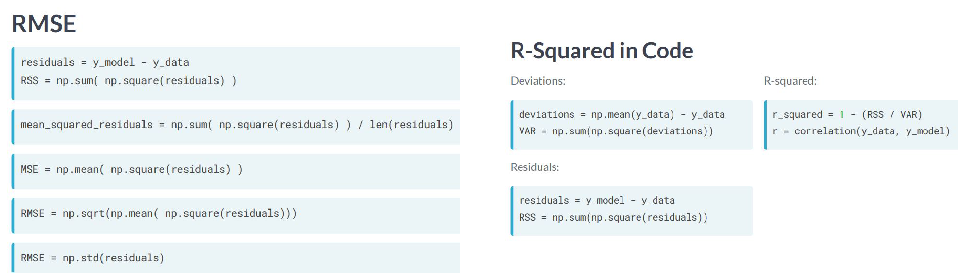

RMSE vs R-Squared:
RMSE: how much variation is residual (RMSE is the most common way to quantify the goodness-of-fit)
R-Squared: what fraction of the variation is linear


Relação entre RMSE, R-squared, RSS e VAR:


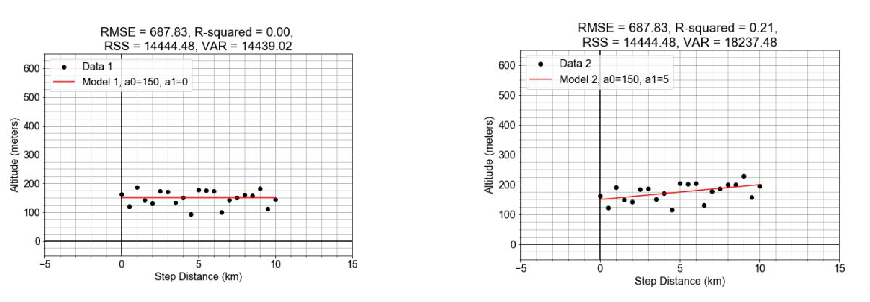

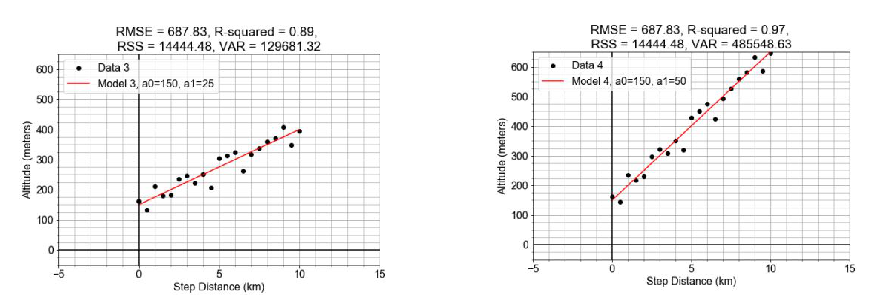

In [46]:
#vídeo
print("""3 Different R's: 
- Building models: RSS
- Evaluating models: RMSE; R-squared""")
plot_2('rmse', 'r_squared', wspace=0.1); 
print("""RMSE vs R-Squared:
RMSE: how much variation is residual (RMSE is the most common way to quantify the goodness-of-fit)
R-Squared: what fraction of the variation is linear\n"""); print("="*120)

print("\nRelação entre RMSE, R-squared, RSS e VAR:")
plot_2('r1', 'r2'); plot_2('r3', 'r4')

Exercício 9

In [47]:
# RMSE Step-by-step

def model_fit_and_predict(x, y):
    a0=150
    a1=25
    ym = a0 + (a1*x)
    return ym

# Build the model and compute the residuals "model - data"
y_model = model_fit_and_predict(x_data, y_data)
residuals = y_model - y_data

# Compute the RSS, MSE, and RMSE and print the results
RSS = np.sum(np.square(residuals))
MSE = RSS/len(residuals)
RMSE = np.sqrt(MSE)
print('RMSE = {:0.2f} \nMSE = {:0.2f} \nRSS = {:0.2f}'.format(RMSE, MSE, RSS))

print("""\nNotice that instead of computing RSS and normalizing with division by len(residuals) to get the MSE, you could
have just applied np.mean(np.square()) to the residuals. Another useful point to help you remember; you can think of the 
MSE like a variance, but instead of differencing the data from its mean, you difference the data and the model.
Similarly, think of RMSE as a standard deviation.""")

RMSE = 250.83 
MSE = 62917.53 
RSS = 1321268.19

Notice that instead of computing RSS and normalizing with division by len(residuals) to get the MSE, you could
have just applied np.mean(np.square()) to the residuals. Another useful point to help you remember; you can think of the 
MSE like a variance, but instead of differencing the data from its mean, you difference the data and the model.
Similarly, think of RMSE as a standard deviation.


Exercício 10

In [48]:
# R-Squared

# Compute the residuals and the deviations
residuals = y_model - y_data
deviations = np.mean(y_model) - y_data

# Compute the variance of the residuals and deviations
var_residuals = np.mean(np.square(residuals))
var_deviations = np.mean(np.square(deviations))

# Compute r_squared as 1 - the ratio of RSS/Variance
r_squared = 1 - (var_residuals / var_deviations)
print('R-squared is {:0.2f}'.format(r_squared))

R-squared is 0.31


#### Exercício 11 - Standard error

In [49]:
#vídeo

print("""Uncertainty in Predictions\n
Model Predictions and RMSE:
 - predictions compared to data gives residuals
 - residuals have spread
 - RMSE, measures residual spread
 - RMSE, quantifies prediction goodness
 
Model Parameters and Standard Error:
 - Parameter value as center
 - Parameter standard error as spread
 - Standard Error, measures parameter uncertainty""")

Uncertainty in Predictions

Model Predictions and RMSE:
 - predictions compared to data gives residuals
 - residuals have spread
 - RMSE, measures residual spread
 - RMSE, quantifies prediction goodness
 
Model Parameters and Standard Error:
 - Parameter value as center
 - Parameter standard error as spread
 - Standard Error, measures parameter uncertainty


Exercício 12

In [50]:
# Variation Around the Trend

# Store x_data and y_data, as times and distances, in df, and use ols() to fit a model to it.
df = pd.DataFrame(dict(times=x_data, distances=y_data))
model_fit = ols(formula="distances ~ times", data=df).fit()

# Extact the model parameters and their uncertainties
a0 = model_fit.params['Intercept']
e0 = model_fit.bse['Intercept']
a1 = model_fit.params['times']
e1 = model_fit.bse['times']

# Print the results with more meaningful names
print('Estimate    of the intercept = {:0.2f}'.format(a0))
print('Uncertainty of the intercept = {:0.2f}'.format(e0))
print('Estimate    of the slope = {:0.2f}'.format(a1))
print('Uncertainty of the slope = {:0.2f}'.format(e1))

Estimate    of the intercept = 102.12
Uncertainty of the intercept = 11.59
Estimate    of the slope = 74.47
Uncertainty of the slope = 1.98


Exercício 13

In [51]:
# Variation in Two Parts

df = hiking.copy()
df['distances1'] = df.distance
df['distances2'] = df['distances1']*np.random.random()
df = df.drop('distance', axis=1)

# Build and fit two models, for columns distances1 and distances2 in df
model_1 = ols(formula="distances1 ~ time", data=df).fit()
model_2 = ols(formula="distances2 ~ time", data=df).fit()

# Extract R-squared for each model, and the standard error for each slope
se_1 = model_1.bse['time']
se_2 = model_2.bse['time']
rsquared_1 = model_1.rsquared
rsquared_2 = model_2.rsquared

# Print the results
print('Model 1: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_1, rsquared_1))
print('Model 2: SE = {:0.3f}, R-squared = {:0.3f}'.format(se_2, rsquared_2))


Model 1: SE = 0.019, R-squared = 0.920
Model 2: SE = 0.017, R-squared = 0.920


# CHAPTER 4 - Estimating Model Parameters

In our final chapter, we introduce concepts from inferential statistics, and use them to explore how maximum likelihood estimation and bootstrap resampling can be used to estimate linear model parameters. We then apply these methods to make probabilistic statements about our confidence in the model parameters.

#### Exercício 1 - Inferential Statistics concepts

In [52]:
#vídeo

# Probability distribution, sampling & resampling

Exercício 2

In [53]:
# Sample Statistics versus Population

population = np.array([ 104.96714153,   98.61735699,  106.47688538,  115.23029856,
         97.65846625,   97.65863043,  115.79212816,  107.67434729,
         95.30525614,  105.42560044,   95.36582307,   95.34270246,
        102.41962272,   80.86719755,   82.75082167,   94.37712471,
         89.8716888 ,  103.14247333,   90.91975924,   85.87696299,
        114.65648769,   97.742237  ,  100.67528205,   85.75251814,
         94.55617275,  101.1092259 ,   88.49006423,  103.75698018,
         93.9936131 ,   97.0830625 ,   93.98293388,  118.52278185,
         99.86502775,   89.42289071,  108.22544912,   87.7915635 ,
        102.08863595,   80.40329876,   86.71813951,  101.96861236,
        107.3846658 ,  101.71368281,   98.84351718,   96.98896304,
         85.2147801 ,   92.80155792,   95.39361229,  110.57122226,
        103.4361829 ,   82.36959845,  103.24083969,   96.1491772 ,
         93.23078   ,  106.11676289,  110.30999522,  109.31280119,
         91.60782477,   96.90787624,  103.31263431,  109.75545127,
         95.20825762,   98.14341023,   88.93665026,   88.03793376,
        108.12525822,  113.56240029,   99.27989878,  110.03532898,
        103.61636025,   93.54880245,  103.61395606,  115.38036566,
         99.64173961,  115.64643656,   73.80254896,  108.21902504,
        100.87047068,   97.0099265 ,  100.91760777,   80.12431085,
         97.80328112,  103.57112572,  114.77894045,   94.81729782,
         91.91506397,   94.98242956,  109.15402118,  103.2875111 ,
         94.70239796,  105.13267433,  100.97077549,  109.68644991,
         92.97946906,   96.72337853,   96.07891847,   85.36485052,
        102.96120277,  102.61055272,  100.05113457,   97.65412867,
         85.84629258,   95.79354677,   96.57285483,   91.97722731,
         98.38714288,  104.04050857,  118.86185901,  101.74577813,
        102.57550391,   99.25554084,   80.81228785,   99.73486125,
        100.6023021 ,  124.63242112,   98.07639035,  103.01547342,
         99.6528823 ,   88.31321962,  111.42822815,  107.51933033,
        107.91031947,   90.90612545,  114.02794311,   85.98148937,
        105.86857094,  121.90455626,   90.09463675,   94.3370227 ,
        100.99651365,   94.96524346,   84.49336569,  100.68562975,
         89.37696286,  104.73592431,   90.80575766,  115.49934405,
         92.16746708,   96.77938484,  108.13517217,   87.69135684,
        102.27459935,  113.07142754,   83.92516765,  101.84633859,
        102.59882794,  107.81822872,   87.63049289,   86.79543387,
        105.21941566,  102.96984673,  102.5049285 ,  103.46448209,
         93.19975278,  102.32253697,  102.93072473,   92.85648582,
        118.65774511,  104.73832921,   88.08696503,  106.56553609,
         90.2531833 ,  107.87084604,  111.58595579,   91.79317682,
        109.63376129,  104.12780927,  108.2206016 ,  118.96792983,
         97.54611884,   92.46263836,   91.1048557 ,   91.84189715,
         99.22898291,  103.41151975,  102.76690799,  108.27183249,
        100.13001892,  114.53534077,   97.35343167,  127.20169167,
        106.25667348,   91.42842444,   89.29107502,  104.82472415,
         97.76537215,  107.14000494,  104.73237625,   99.27171087,
         91.53206282,   84.85152775,   95.53485048,  108.56398794,
        102.14093744,   87.54261221,  101.73180926,  103.8531738 ,
         91.16142564,  101.53725106,  100.58208718,   88.57029702,
        103.5778736 ,  105.60784526,  110.83051243,  110.53802052,
         86.22330632,   90.6217496 ,  105.15035267,  105.13785951,
        105.15047686,  138.52731491,  105.70890511,  111.3556564 ,
        109.54001763,  106.51391251,   96.84730755,  107.5896922 ,
         92.27174785,   97.63181393,   95.14636452,  100.81874139,
        123.14658567,   81.32734807,  106.8626019 ,   83.87284129,
         95.28068134,  110.88950597,  100.64280019,   89.22255222,
         92.84696291,  106.79597749,   92.69633368,  102.1645859 ,
        100.4557184 ,   93.48399652,  121.43944089,  106.33919022,
         79.74857413,  101.86454315,   93.38213535,  108.52433335,
         92.07479262,   98.85263559,  105.04987279,  108.65755194,
         87.99703593,   96.65498764,   95.25054689,   93.46670767,
        117.6545424 ,  104.04981711,   87.39116046,  109.17861947,
        121.22156197,  110.32465261,   84.80630034,   95.15765927,
        112.66911149,   92.92330534,  104.43819428,  107.74634053,
         90.73069528,   99.40474644,   67.5873266 ,   89.75612359,
         97.47431849,   87.52216818,  116.32411304,   85.69858622,
         95.59955513,  101.30740577,  114.41273289,   85.64137849,
        111.63163752,  100.10233061,   90.18491349,  104.62103474,
        101.99059696,   93.99783123,  100.69802085,   96.14686403,
        101.13517345,  106.62130675,  115.86016816,   87.62184501,
        121.33033375,   80.479122  ,   98.48214905,  105.88317206,
        102.80991868,   93.7730048 ,   97.9187775 ,   95.06999065,
         94.10635243,  108.49602097,  103.57015486,   93.07090405,
        108.99599875,  103.07299521,  108.12862119,  106.29628842,
         91.71004989,   94.3981896 ,  107.47293605,  106.10370265,
         99.79098406,  101.17327383,  112.77664896,   94.08428611,
        105.47097381,   97.97807348])

In [54]:
# Compute the population statistics
print("Population mean {:.1f}, stdev {:.2f}".format( population.mean(), population.std() ))

# Set random seed for reproducibility
np.random.seed(42)

# Construct a sample by randomly sampling 31 points from the population
sample = np.random.choice(population, size=31)

# Compare sample statistics to the population statistics
print("    Sample mean {:.1f}, stdev {:.2f}".format( sample.mean(), sample.std() ))

Population mean 100.0, stdev 9.74
    Sample mean 102.1, stdev 9.34


Exercício 3

In [55]:
# Variation in Sample Statistics

num_samples = 100; num_pts = 1000

# Initialize two arrays of zeros to be used as containers
means = np.zeros(num_samples)
stdevs = np.zeros(num_samples)

# For each iteration, compute and store the sample mean and sample stdev
for ns in range(num_samples):
    sample = np.random.choice(population, num_pts)
    means[ns] = sample.mean()
    stdevs[ns] = sample.std()

# Compute and print the mean() and std() for the sample statistic distributions
print("Means:  center={:>6.2f}, spread={:>6.2f}".format(means.mean(), means.std()))
print("Stdevs: center={:>6.2f}, spread={:>6.2f}".format(stdevs.mean(), stdevs.std()))

# If we only took one sample, instead of 100, there could be only a single mean and the standard deviation of that single
# value is zero. But each sample is different because of the randomness of the draws. The mean of the means is our estimate 
# for the population mean, the stdev of the means is our measure of the uncertainty in our estimate of the population mean.
#      This is the same concept as the standard error of the slope seen in linear regression.

Means:  center=100.01, spread=  0.32
Stdevs: center=  9.67, spread=  0.24


Exercício 4

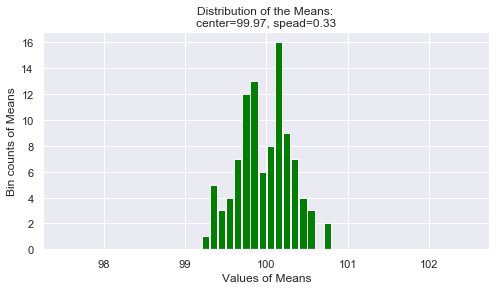

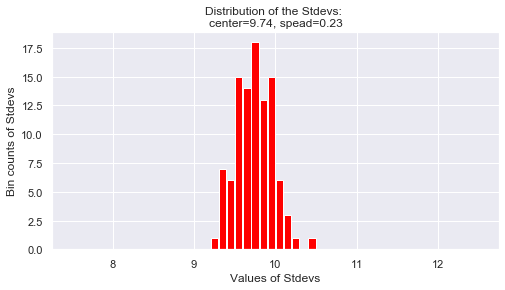

In [56]:
# Visualizing Variation of a Statistic

def get_sample_statistics(population, num_samples=100, num_pts=1000):
    means = np.zeros(num_samples)
    deviations = np.zeros(num_samples)
    for ns in range(num_samples):
        sample = np.random.choice(population, num_pts)
        means[ns] = sample.mean()
        deviations[ns] = sample.std()
    return means, deviations

def plot_hist(data, bins, data_name, color='blue'):
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8,4))
    axis.hist(data, bins=bins, rwidth=0.9, color=color)
    title = 'Distribution of the {}: \ncenter={:0.2f}, spead={:0.2f}'.format(data_name, data.mean(), data.std())
    x_label = 'Values of {}'.format(data_name)
    y_label = 'Bin counts of {}'.format(data_name)
    axis.set_ylabel(y_label)
    axis.set_xlabel(x_label)
    axis.set_title(title)
    plt.show()
    return fig

################################################################

# Generate sample distribution and associated statistics
means, stdevs = get_sample_statistics(population, num_samples=100, num_pts=1000)

# Define the binning for the histograms
mean_bins = np.linspace(97.5, 102.5, 51)
std_bins = np.linspace(7.5, 12.5, 51)

# Plot the distribution of means, and the distribution of stdevs
fig = plot_hist(data=means, bins=mean_bins, data_name="Means", color='green')
fig = plot_hist(data=stdevs, bins=std_bins, data_name="Stdevs", color='red')


#### Exercício 5 - Model Estimation and Likelihood

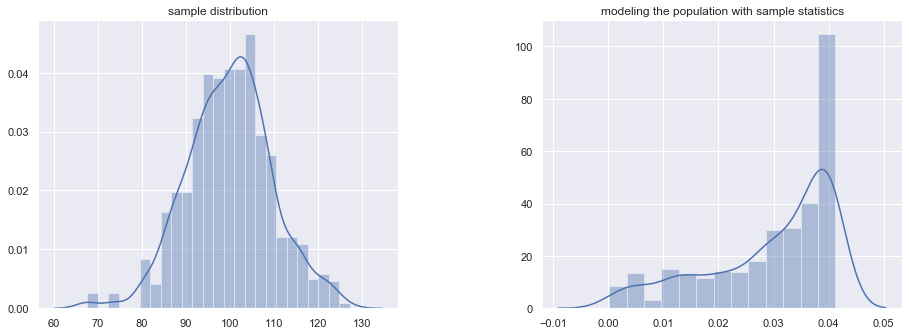

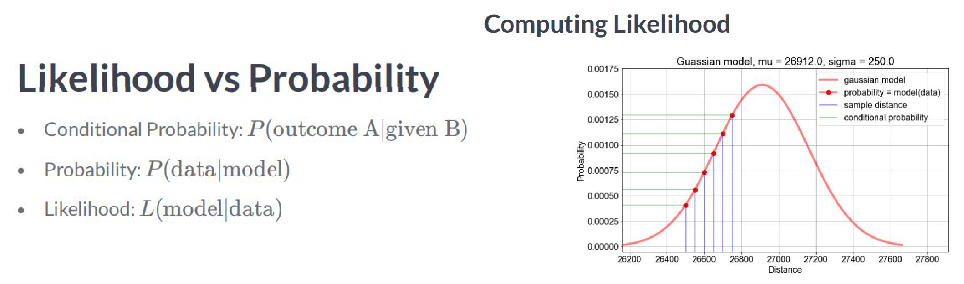

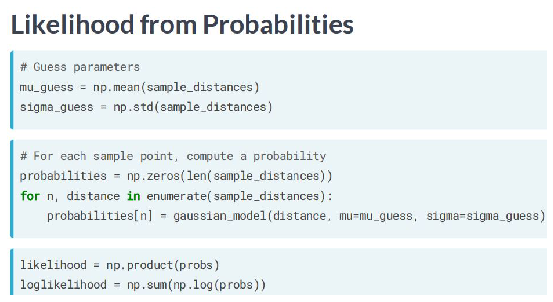

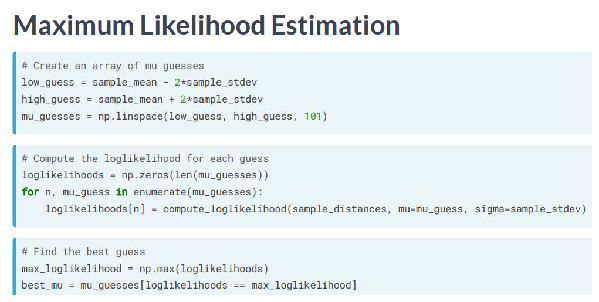

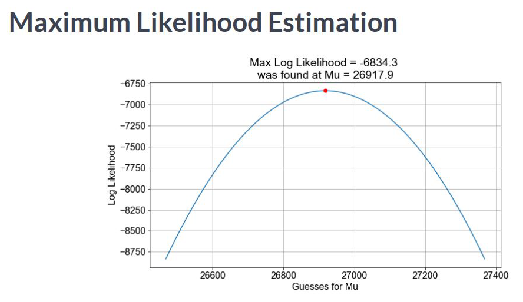

In [57]:
#vídeo

# Estimation

# gaussian model function
def gaussian_model(x, mu, sigma):
    coeff_part = 1/(np.sqrt(2 * np.pi * sigma**2))
    exp_part = np.exp( - (x - mu)**2 / (2 * sigma**2) )
    return coeff_part*exp_part

# sample statistics
mean = np.mean(sample)
stdev = np.std(sample)

# Model the population using sample statistics
population_model = gaussian_model(sample, mu=mean, sigma=stdev)

plt.subplot(1, 2, 1); sns.distplot(sample); plt.title('sample distribution')
plt.subplot(1, 2, 2); sns.distplot(population_model); plt.title('modeling the population with sample statistics')
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0.4, hspace=0); plt.show()

#################

# Likelihood vs Probability

plot_2('likelihood_prob', 'likelihood_computation'); plot_1('like_from_prob', right=1.6);
plot_1('mle', right=1.6); plot_1('mle_2', right=1.6)

Exercício 6

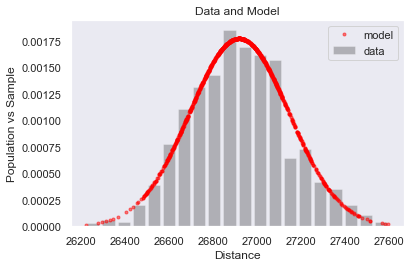

Notice in the plot that the data and the model do not line up exactly. This is to be expected because the sample
is just a subset of the population, and any model built from it cannot be a prefect representation of the population. 

Also notice the vertical axis: it shows the normalize data bin counts, and the probability density of the model. 
Think of that as probability-per-bin, so that if summed all the bins, the total would be 1.0.


In [58]:
# Estimation of Population Parameters

# Imagine a constellation ("population") of satellites orbiting for a full year, and the distance traveled in each hour 
# is measured in kilometers. There is variation in the distances measured from hour-to-hour, due to unknown complications 
# of orbital dynamics. Assume we cannot measure all the data for the year, but we wish to build a population model for the
# variations in orbital distance per hour (speed) based on a sample of measurements.

# In this exercise, you will assume that the population of hourly distances are best modeled by a gaussian, and further 
# assume that the parameters of that population model can be estimated from the sample statistics. Start with the preloaded
# sample_distances that was taken from a population of cars.

sample_distances = np.array([ 27143.88628178,  27087.98325817,  27580.04229165,  27113.1083337 ,
        27057.40721048,  26693.19226411,  26916.87962035,  27229.72020211,
        26755.77703262,  26994.32512326,  26863.90989702,  26885.76359407,
        27055.16802439,  26846.50278894,  26761.62724163,  27011.92714   ,
        27006.0414866 ,  27112.55543553,  27075.29318558,  27241.03510749,
        26886.05773059,  26853.25717425,  27356.50242839,  27083.71944651,
        27048.1317373 ,  26833.17214224,  27187.1114273 ,  26792.09492182,
        27327.65334315,  26905.32791217,  26965.08045969,  26781.97735558,
        27001.76307178,  26457.73102378,  27104.47241451,  27039.42276518,
        26984.93044729,  27015.64782321,  26734.91971513,  26917.33608426,
        27018.00056773,  26687.14839143,  27339.65512105,  26999.48176249,
        27232.23332988,  27055.67780598,  26558.44932455,  26853.1677454 ,
        26801.88222348,  26861.18523779,  26801.07982206,  27313.85177827,
        27028.90702211,  27134.47888438,  27184.32863559,  26655.06969382,
        26766.95785922,  27246.58734932,  26859.90997974,  26843.13093501,
        27453.13275985,  26873.41574937,  26878.4825768 ,  26822.42307365,
        26994.9099121 ,  26946.60404244,  26877.97718899,  26823.59522223,
        26901.05746475,  27042.79485155,  26678.05762212,  26815.86185253,
        26705.87521488,  27025.03575828,  26601.45264973,  27063.85095746,
        26873.54531063,  26962.82916206,  27075.37369548,  27084.79512368,
        26864.61856166,  27223.18632238,  26557.40113102,  26995.79204744,
        26917.01806731,  26749.54338877,  26600.2621505 ,  26919.74101142,
        27092.700555  ,  26977.8727147 ,  26849.13471473,  26524.28234783,
        26903.92055912,  26957.90186854,  27053.1976854 ,  27113.30038626,
        26833.69061488,  26980.32286769,  27457.87472776,  26607.4298234 ,
        27120.50297762,  26813.97549293,  27119.1785466 ,  26990.11041907,
        26753.55181914,  26525.20469951,  26842.72974227,  26973.67981323,
        26644.18669416,  27335.23537165,  26974.77143351,  27114.95839037,
        26858.96264682,  26835.49786595,  26531.37432824,  27126.72630558,
        26913.79981063,  26860.88065597,  27238.26729004,  26903.87271231,
        27513.09247822,  26548.8345489 ,  26999.26166747,  27057.7189009 ,
        26855.09506965,  26846.60168945,  26998.49380647,  26681.04629384,
        27053.79099607,  26496.07750486,  27036.1456002 ,  27016.92252596,
        26481.37833241,  27463.50952723,  26941.62131814,  26709.51469047,
        26566.83038974,  27183.90514637,  26857.18592379,  26890.57821981,
        27297.38075903,  27182.21187189,  27007.75242303,  26745.98219617,
        26604.88487869,  27265.42925406,  26966.86884722,  26737.8827    ,
        26861.68486165,  27100.295441  ,  27187.91639576,  27244.33375738,
        26785.46575254,  26596.83571684,  26634.24093179,  26977.26170876,
        26837.52656605,  27161.00628236,  26824.60504805,  26818.95578474,
        26933.79406034,  26746.69702688,  26992.12439671,  26594.40884625,
        27136.65457708,  27006.47774178,  27348.6312121 ,  26640.05169387,
        26714.48926311,  26976.750765  ,  26891.78137871,  27415.10567461,
        26863.34205649,  26864.13041363,  26933.87284308,  27240.9018238 ,
        26780.34584953,  27101.21398455,  26536.27695868,  27205.70198053,
        26766.53883905,  26828.57836298,  26995.50842643,  26714.33520856,
        26850.33271654,  27351.41721953,  26804.22626971,  26654.90293713,
        27304.44206032,  26847.36626491,  26804.55720083,  26829.07844477,
        26764.00163473,  27052.12291217,  26567.20279511,  26960.61254516,
        27065.57672416,  26744.10077992,  27314.71742361,  26663.42154431,
        26970.9819719 ,  26694.67840398,  26996.04004449,  26801.79974578,
        27061.01623074,  26937.19018333,  26857.45686715,  26593.49519935,
        26716.65215727,  27010.58406499,  27054.09857263,  26944.52372485,
        26878.21290192,  26989.57495373,  27096.37064746,  26716.88817842,
        26836.57256623,  27033.67598741,  26863.87803964,  27047.20798789,
        27034.91369359,  26685.87451072,  27039.83885243,  26791.89970318,
        26849.33668429,  27026.34834406,  26695.23683922,  26904.80471305,
        26436.85015118,  26830.81472121,  26911.67043354,  27404.79981318,
        26957.87969301,  27033.96423562,  26957.63539671,  26771.38920367,
        27258.24706918,  26968.81217189,  27199.03755538,  26961.52942659,
        26739.94237613,  27134.65276966,  26630.07179143,  26754.10986303,
        26734.2688266 ,  26955.89986361,  26980.93876681,  26780.9502099 ,
        26881.43697313,  26861.55370871,  26938.04451192,  27424.71030759,
        27224.90782133,  27567.66884372,  26942.45666815,  26666.49862448,
        26811.51215308,  26862.3358439 ,  26990.77460817,  26724.01040161,
        26716.03660602,  27089.57059653,  27089.43869505,  26738.7977659 ,
        26639.01975494,  26732.8054403 ,  27148.6025703 ,  26772.1406178 ,
        26823.98368548,  26944.55993598,  26899.06286655,  27274.75301706,
        26732.66097594,  27078.97928512,  27156.28365114,  26674.92376282,
        26591.16650517,  26901.28578514,  26854.2124564 ,  26637.76152564,
        27067.74816302,  26977.5439568 ,  26938.91884692,  27056.15166122,
        26905.21037053,  26887.87603461,  26618.12393823,  26842.1454847 ,
        27243.69949251,  27019.77978195,  27024.08660277,  26942.38510255,
        26855.35443262,  26486.76635941,  26514.29446274,  26886.15161863,
        26585.50047227,  26654.4768983 ,  26991.29015812,  27157.85397661,
        26933.96043703,  26890.65691518,  27238.72323288,  26805.130186  ,
        27125.58144028,  27327.70213603,  27171.75239724,  27093.72863873,
        26587.66972079,  26617.52797802,  26821.20198502,  26857.73533964,
        26635.38737764,  26661.90040372,  26829.5779198 ,  26741.62947342,
        27190.30556829,  26579.22864091,  27497.96834736,  27081.02355063,
        26769.52914657,  26985.74574184,  27595.80878556,  26487.11507164,
        27292.42142024,  26733.38001826,  26648.9204039 ,  27429.34320411,
        26843.95841763,  26892.15101573,  26822.53694383,  26475.39327269,
        26981.99259762,  26764.28248029,  27077.40025535,  26873.83834394,
        27194.15938715,  26953.27264372,  26964.84608336,  27080.18180957,
        26683.31744167,  26502.83895785,  26844.16395718,  27134.59783351,
        26990.62775284,  26922.07725332,  27190.05269203,  27065.33499104,
        27268.61508165,  26512.11430426,  26612.70415815,  26942.6117626 ,
        26785.98958143,  26879.59951891,  27074.25111081,  26638.0334235 ,
        26858.27340454,  27265.22585654,  26731.03040891,  26706.0906174 ,
        26881.98394737,  27076.9711286 ,  27072.06023771,  27172.94087273,
        26860.60951111,  26637.69630775,  26921.5832547 ,  26868.06131472,
        26600.09476209,  26660.55416077,  26615.43446626,  26834.83778753,
        27068.60120026,  26916.29208527,  26988.51212715,  26825.589366  ,
        27010.21997456,  26767.49717399,  26582.69461741,  26654.01298353,
        26878.09411344,  26842.16941808,  26769.71400851,  26793.55753181,
        26780.7725181 ,  26832.16520869,  26520.33080082,  26878.99396777,
        26626.28412691,  26836.54178272,  26747.54469582,  27325.33127661,
        27000.43140943,  26591.54085344,  27050.44515082,  26819.78852642,
        26768.79271964,  26623.20005054,  26499.24012889,  27034.55732796,
        26972.30548523,  27076.97833476,  27145.97653883,  27370.45045816,
        26788.54262976,  27185.12908371,  27105.10953604,  26633.87050673,
        26497.62446903,  26629.59429991,  27303.09765554,  27512.90634296,
        26979.4130203 ,  27288.31979692,  26775.90921763,  27246.3093449 ,
        26702.97967346,  27127.80327595,  26887.79015222,  26845.61680541,
        27325.07216057,  26912.04092278,  26698.64746013,  27069.89578735,
        26896.89216195,  26825.16825668,  26719.23253875,  27089.1351968 ,
        26907.17017392,  26615.46233873,  26647.44351774,  26882.2284668 ,
        26873.25430701,  27131.32632721,  26561.99089323,  26896.45048256,
        26779.47437051,  26866.97946212,  26580.68558289,  26866.31573419,
        26942.87693368,  26575.09935991,  26895.31801405,  26927.33675451,
        27097.5658296 ,  27128.16478439,  26405.45893621,  26994.71552069,
        27063.31273634,  26748.21332282,  26808.8932871 ,  26724.7750947 ,
        26886.51488927,  26505.51673261,  26998.04607751,  26816.22792519,
        26849.55072425,  26826.30312419,  27380.98648648,  27001.70154691,
        26945.59491929,  26892.01594966,  27008.94931909,  27216.56367404,
        26780.61753675,  27085.16847858,  27309.98648719,  27024.33210759,
        26696.51722235,  26885.77145915,  27091.30918844,  27288.44923661,
        26843.78490903,  26995.37811275,  27138.50850968,  27075.52853479,
        26788.01558595,  26686.5137108 ,  26907.76987956,  27043.41094828,
        27002.33688256,  27000.58628711,  26923.24546555,  26992.01623444,
        26839.18921918,  26876.01983098,  26824.33127226,  26670.56916053,
        27171.51413067,  26223.68323013,  27181.98404   ,  26803.87711263,
        27103.321864  ,  27095.93537004,  26770.49982931,  27057.20228503,
        27221.60761577,  27094.98258615,  27115.18560631,  26842.77894778,
        27323.4894849 ,  26881.86334618,  26837.51410218,  27130.37924233,
        26660.94358069,  26731.11198984,  26905.96625456,  26789.17451613,
        26934.47552903,  26695.9977087 ,  26951.91390559,  26930.80109208,
        26650.40867341,  27314.64800395,  26801.46760827,  27087.49867632,
        26630.66491592,  26918.4092305 ,  26953.25107897,  26717.30404149,
        26949.66946678,  26754.97063429,  26870.10207066,  26807.38876625,
        27107.55234701,  26601.59319672,  26821.24022814,  26685.63552257,
        27044.86820473,  27416.09728796,  26677.99084544,  26854.67530358,
        26786.93680732,  27010.23095439,  27232.56444479,  26887.24710797,
        26680.41523995,  26834.47744991,  27062.41793769,  26763.82670317,
        26935.17919968,  27100.28799049,  26698.32757744,  27198.96478924,
        26650.21345545,  26887.53157538,  26814.57686748,  26605.44529358,
        27215.91089759,  26685.02505006,  26807.00356023,  27183.35159978,
        27299.01025863,  26540.3273963 ,  27014.04664468,  27182.21812316,
        26767.58852115,  27009.07760766,  26723.04531565,  27017.79895826,
        26768.65088691,  26777.76464446,  26315.61040777,  27133.86367531,
        26918.66726152,  26853.81704745,  27347.05391   ,  26766.18432387,
        26960.80182685,  26988.449127  ,  26876.66140718,  26939.05893723,
        26982.01789116,  26919.20819375,  26747.81346849,  26717.85402756,
        26739.96859867,  27046.28760018,  26679.84821861,  26675.41876112,
        26896.86351377,  26834.36394749,  27025.01206036,  26832.62404834,
        26796.37376438,  26722.27745533,  26604.57505423,  26874.84134077,
        26709.89006538,  26647.86223725,  27365.60478048,  27250.48206328,
        26943.0014568 ,  26681.2406666 ,  26908.14576762,  26768.46801898,
        26704.72233385,  27395.07225842,  26555.49997708,  26920.70572279,
        26787.9513203 ,  26621.50935879,  27023.69869608,  26983.26169904,
        27051.78206884,  26924.32570734,  27221.81159283,  27041.46242069,
        26893.2471373 ,  26620.10418654,  26803.4755538 ,  27110.75619235,
        26971.28591253,  27004.02059281,  26482.00284554,  26667.06080455,
        26796.77272328,  27053.93552085,  26917.11701927,  26742.88375437,
        26597.94705253,  26947.42274881,  26702.75921747,  26960.44887525,
        27066.83062975,  26638.57233818,  26636.88207672,  27326.19853941,
        26900.83561322,  26931.97729053,  26599.46245532,  27348.70514627,
        26950.12066067,  26695.35062517,  26729.06808538,  26998.34292279,
        27019.78429031,  26763.23333842,  27147.21522235,  26754.26076967,
        26655.98520353,  27086.3651111 ,  26652.40607143,  27091.7757577 ,
        27062.96184973,  27105.95015082,  26792.60176359,  27127.00319873,
        27050.079599  ,  26845.32238507,  27226.1787699 ,  26931.21354275,
        26680.03663918,  26945.87861519,  27201.82207787,  26941.14577377,
        26893.08110167,  26805.7467604 ,  27194.65948651,  26793.96677552,
        27206.19599613,  27224.62796493,  26875.27332831,  27283.97611498,
        26983.48649331,  27219.68903172,  27052.57102147,  26933.15409584,
        27139.31217806,  26976.22048026,  26774.99891765,  26942.74073873,
        27038.3178845 ,  27087.09341814,  26995.69255902,  26946.14042527,
        26903.47898471,  26733.12804219,  27300.39468856,  27033.12914345,
        27234.96606573,  27323.80585794,  27321.96344636,  26843.46999031,
        26674.17193316,  26972.83513715,  27146.64170615,  26489.85474017,
        27210.57478495,  27165.28016939,  27195.45813929,  26727.86490468,
        27104.78719821,  27051.34953546,  26836.93814066,  26592.54776213,
        26703.80227206,  26855.44832291,  26593.15487319,  26671.55142006,
        27236.79514512,  27169.13090286,  27250.99331408,  26833.65624651,
        26943.85545535,  26832.80716137,  26777.88560215,  26914.76627881,
        27097.62559952,  26963.72096872,  26797.53748958,  26941.24868294,
        26658.10570875,  26719.42705881,  27128.30406468,  27038.41144606,
        26989.98023337,  26780.44553277,  26643.26778624,  27122.50113836,
        26820.2468365 ,  26743.371561  ,  26625.22120759,  26910.22885212,
        26676.67434759,  26931.08841229,  27028.30751521,  26715.73606702,
        27097.83048853,  26752.17630407,  26671.09756155,  26755.26600278,
        26370.7931108 ,  26928.53647969,  27075.80042784,  26578.35985294,
        27002.0644265 ,  27019.44718263,  26924.43204291,  27396.64607862,
        27166.88130204,  26738.05290813,  26911.29195765,  26870.85296559,
        26996.29539281,  27051.67225526,  26675.14343869,  26936.77477091,
        26994.14449431,  26636.99318269,  26754.42383871,  26852.07254784,
        27023.25751189,  27078.57722094,  26665.21185785,  27378.73907689,
        26990.43019433,  27042.00311502,  26535.25252992,  27217.66345914,
        26864.36032814,  26728.99675236,  26810.25495155,  27081.33425362,
        26610.70127851,  26750.27968439,  26660.33556415,  26502.09070115,
        26759.74644598,  26331.88707073,  26953.62290489,  27225.54555162,
        26803.85604939,  27015.80260236,  27063.97236074,  27385.62714809,
        27314.66456811,  26605.24572727,  27196.06336614,  26540.36402604,
        26714.60999015,  27070.9127378 ,  26624.93717501,  26768.40846424,
        26654.76203627,  26499.09780301,  26631.22707081,  26920.58225453,
        26877.40880054,  27082.2237341 ,  26827.86981599,  27183.80817945,
        27254.65759647,  26986.3498665 ,  26891.20102975,  26772.17730581,
        27022.56291652,  27222.27181425,  27032.95585834,  26425.61520155,
        26990.75731642,  27025.2380441 ,  27350.73641571,  26586.64903611,
        26649.97317418,  27111.79872903,  26925.84914513,  26846.22885122,
        27101.85249399,  26902.73954691,  26984.05823343,  27023.62942578,
        27034.21271529,  27017.04554648,  26768.6557724 ,  26518.5160293 ,
        26836.093973  ,  27304.38452298,  27475.42373782,  26828.68336861,
        26861.25909624,  26845.25731839,  26656.6082006 ,  27407.50248621,
        27059.52042785,  26616.03753249,  26557.44125806,  26943.8869675 ,
        26898.74692024,  26994.91799687,  27083.65141568,  27085.82309686,
        26841.77912625,  27103.62403982,  27343.12373789,  26845.49505206,
        26532.02269793,  27032.98876105,  27053.56903534,  27411.25022777,
        27029.58842804,  26929.58851687,  26818.69960195,  27306.97990886,
        26495.64048647,  26792.38926062,  26833.75249299,  26909.81195161,
        27208.8970663 ,  26952.93021651,  27031.57025867,  26887.10128666,
        26771.66893823,  26523.07005484,  27362.29681554,  26927.53837938,
        26917.88028539,  26900.10269084,  27240.5227911 ,  27081.44638233,
        26677.93446405,  26917.97260646,  26836.60271979,  26461.22083287,
        27281.22945966,  27273.74150261,  26976.44476805,  26875.84043766,
        27106.3293943 ,  26799.52335095,  27007.24644262,  26665.16966301,
        27304.18394391,  27274.59688309,  26698.09233131,  26791.34443134,
        26933.52542265,  27092.15719432,  27459.08034851,  26978.15558848,
        26720.64676711,  27305.78954085,  26858.61814665,  26297.59172422,
        26943.93494132,  26793.18115764,  26675.93582648,  27329.56087595,
        26623.85064432,  26954.93895181,  27006.99634429,  26972.19643487,
        26548.91205334,  26700.5882683 ,  27218.44546661,  26653.55229226,
        26677.28514474,  26748.3959728 ,  26915.79737455,  27158.97192811,
        27290.58173574,  27086.98581331,  27006.43260782,  27106.01510998,
        26701.22838215,  26578.52101416,  26722.69176413,  27027.26101764,
        26762.08980586,  27096.09446463,  26943.22569795,  26505.59147123,
        26863.34213189,  26494.20132514,  26753.72611516,  26778.60980042,
        27008.33743502,  26985.91717751,  26615.82439677,  26866.19639427,
        27206.61338108,  26607.41840873,  26832.85939927,  26838.13637565,
        26850.27608958,  26713.03256229,  27093.70907553,  26728.60490451,
        26721.61336247,  26856.95405826,  26780.65391093,  27152.90060359,
        27065.71310498,  26868.56348521,  26870.46747994,  27160.40631194,
        26603.45129763,  27164.29835919,  27050.25504941,  27038.57219125,
        27114.21399491,  27015.82602835,  26782.83405673,  27119.42172252,
        27207.79904991,  27087.54947541,  26697.06522995,  27025.00358675,
        27463.94277955,  27439.92924195,  26758.2418425 ,  27170.83196079,
        27004.1265311 ,  26973.39457052,  26824.44913799,  26887.24803323,
        26540.11143709,  26977.01335687,  27026.48820243,  26876.57197134,
        26961.04725683,  26774.41004752,  27028.82952681,  26884.38731073,
        26917.86490144,  27221.46739035,  26567.3547064 ,  27437.83066131,
        27007.37053409,  26934.79679098,  26828.67647402,  26918.02157083,
        27102.91594912,  26926.21346822,  26703.24071232,  26752.40561732,
        26910.72499058,  27073.01916917,  26714.79735407,  27113.196917  ,
        26925.71162521,  27427.67784218,  27051.8207997 ,  26884.4680432 ,
        26856.70934044,  27114.99783882,  26937.11394529,  26952.30554279,
        26733.23494685,  27091.61448119,  27192.92226796,  27068.805274  ,
        26347.87498413,  27106.86164021,  26970.13665055,  26279.50028187,
        26497.08684322,  27254.38245243,  26942.48399784,  26898.40060351])

def plot_data_and_model(data, model, opt_sort=False):
    data_bins = np.linspace(np.min(data), np.max(data), 21)
    data_opts = dict(rwidth=0.8, color='black', alpha=0.25)
    model_opts = dict(linewidth=4, color='red', alpha=0.5, linestyle=' ', marker="." )
    if opt_sort:
        # Note: Critical thing students get wrong a LOT!
        # By default, we turn off linestyle, which connects-the-dots in order
        # This is bad here, because the data and model are not sorted in order of increasing distance
        # Sorting only the data or only the model, by size, will break everything,
        # since the model and data are connected point-by-point, they both must be sorted together
        # Here we sort by data (distance)
        sort_indices = np.argsort(data)
        data = data[sort_indices]
        model = model[sort_indices]
        model_opts = dict(linewidth=4, color='red', alpha=0.5, linestyle='-', marker="." )
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(6,4))
    count, bins, patches = axis.hist(data, data_bins, density=True, cumulative=False, label='data', **data_opts)
    line = axis.plot(data, model, label='model', **model_opts)
    axis.grid()
    axis.set_ylabel("Population vs Sample")
    axis.set_xlabel("Distance")
    axis.legend()
    # title = axis.set_title('Guassian model, mu = {:0.1f}, sigma = {:0.1f}'.format(mu, sigma))
    title = axis.set_title('Data and Model')
    fig.tight_layout()
    plt.show()
    return fig

################################################

# Compute the mean and standard deviation of the sample_distances
sample_mean = np.mean(sample_distances)
sample_stdev = np.std(sample_distances)

# Use the sample mean and stdev as estimates of the population model parameters mu and sigma
population_model = gaussian_model(sample_distances, mu=sample_mean, sigma=sample_stdev)

# Plot the model and data to see how they compare
fig = plot_data_and_model(sample_distances, population_model)

################################################

print("""Notice in the plot that the data and the model do not line up exactly. This is to be expected because the sample
is just a subset of the population, and any model built from it cannot be a prefect representation of the population. 

Also notice the vertical axis: it shows the normalize data bin counts, and the probability density of the model. 
Think of that as probability-per-bin, so that if summed all the bins, the total would be 1.0.""")

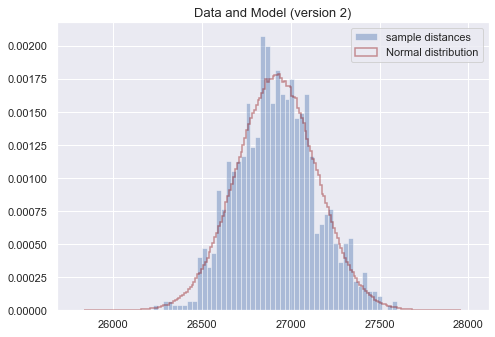

In [59]:
# meu (mais fácil)

# data from samples
sns.distplot(sample_distances, bins=50, label='sample distances', kde_kws={"alpha": 0.00001}) 

# as if it had a normal distribution (model)
normal_sample_distances = np.random.normal(sample_mean, sample_stdev, size=1000000)
sns.distplot(normal_sample_distances, label='Normal distribution', bins=200, 
             hist_kws={"histtype":"step", "linewidth": 1.5, "color":"darkred"}, kde_kws={"alpha": 0.00001}) 

plt.title('Data and Model (version 2)', fontsize=13); plt.legend()
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0); plt.show()

Exercício 7

In [60]:
print("""Previously, we chose the sample mean as an estimate of the population model paramter mu. But how do we know that 
the sample mean is the best estimator? This is tricky, so let's do it in two parts.

In Part 1, you will use a computational approach to compute the log-likelihood of a given estimate. 
Then, in Part 2, we will see that when you compute the log-likelihood for many possible guess values of the estimate,
one guess will result in the maximum likelihood.""")


Previously, we chose the sample mean as an estimate of the population model paramter mu. But how do we know that 
the sample mean is the best estimator? This is tricky, so let's do it in two parts.

In Part 1, you will use a computational approach to compute the log-likelihood of a given estimate. 
Then, in Part 2, we will see that when you compute the log-likelihood for many possible guess values of the estimate,
one guess will result in the maximum likelihood.


For guesses mu=26918.39 and sigma=224.99, the loglikelihood=-6834.98

Although the likelihood (the product of the probabilities) is easier to interpret, the loglikelihood has better 
numerical properties. Products of small and large numbers can cause numerical artifacts, but sum of the logs usually doesn't
suffer those same artifacts, and the "sum(log(things))" is closely related to the "product(things).


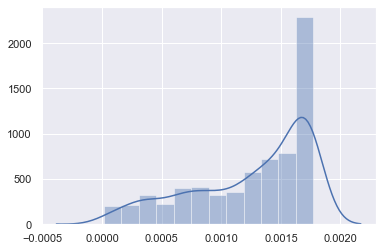

In [61]:
# Maximizing Likelihood, Part 1

# Compute sample mean and stdev, for use as model parameter value guesses
mu_guess = np.mean(sample_distances)
sigma_guess = np.std(sample_distances)

# For each sample distance, compute the probability modeled by the parameter guesses
probs = np.zeros(len(sample_distances))
for n, distance in enumerate(sample_distances):
    probs[n] = gaussian_model(distance, mu=mu_guess, sigma=sigma_guess)

# Compute and print the log-likelihood as the sum() of the log() of the probabilities
loglikelihood = np.sum(np.log(probs))
print('For guesses mu={:0.2f} and sigma={:0.2f}, the loglikelihood={:0.2f}'.format(mu_guess, sigma_guess, loglikelihood))

print("""\nAlthough the likelihood (the product of the probabilities) is easier to interpret, the loglikelihood has better 
numerical properties. Products of small and large numbers can cause numerical artifacts, but sum of the logs usually doesn't
suffer those same artifacts, and the "sum(log(things))" is closely related to the "product(things).""")

sns.distplot(probs); plt.show()

Exercício 8

Maximum loglikelihood found for best mu guess=[26918.39241406]


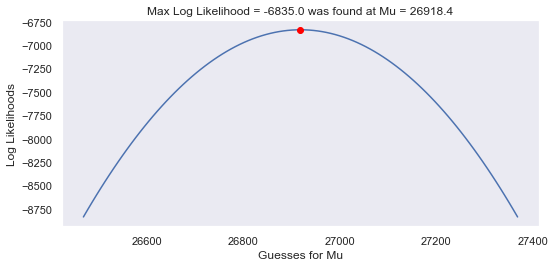

Sample mean: 26918.392414057933
 
Notice that the guess for mu that gave the maximum likelihood is precisely the same value as the sample.mean(). 
The sample_mean is thus said to be the "Maximum Likelihood Estimator" of the population mean mu. We call that value of mu
the "Maximum Likelihood Estimator" of the population mu because, of all the mu values tested, it results in a model
population with the greatest likelihood of producing the sample data we have.


In [62]:
# Maximizing Likelihood, Part 2

def compute_loglikelihood(samples, mu, sigma=250):
    probs = np.zeros(len(samples))
    for n, sample in enumerate(samples):
        probs[n] = gaussian_model(sample, mu, sigma)
    loglikelihood = np.sum(np.log(probs))
    return loglikelihood

def plot_loglikelihoods(mu_guesses, loglikelihoods):
    max_loglikelihood = np.max(loglikelihoods)
    max_index = np.where(loglikelihoods==max_loglikelihood)
    max_guess = mu_guesses[max_index][0]
    font_options = {'family' : 'Arial', 'size'   : 16}
    plt.rc('font', **font_options)
    fig, axis = plt.subplots(figsize=(8, 4))
    axis.plot(mu_guesses, loglikelihoods)
    axis.plot(max_guess, max_loglikelihood, marker="o", color="red")
    axis.grid()
    axis.set_ylabel('Log Likelihoods')
    axis.set_xlabel('Guesses for Mu')
    axis.set_title('Max Log Likelihood = {:0.1f} was found at Mu = {:0.1f}'.format(max_loglikelihood, max_guess))
    fig.tight_layout()
    plt.show()
    return fig

#####################################################################################################################

# Create an array of mu guesses, centered on sample_mean, spread out +/- by sample_stdev
low_guess = sample_mean - 2*sample_stdev
high_guess = sample_mean + 2*sample_stdev
mu_guesses = np.linspace(low_guess, high_guess, 101)

# Compute the loglikelihood for each model created from each guess value
loglikelihoods = np.zeros(len(mu_guesses))
for n, mu_guess in enumerate(mu_guesses):
    loglikelihoods[n] = compute_loglikelihood(sample_distances, mu=mu_guess, sigma=sample_stdev)

# Find the best guess by using logical indexing, the print and plot the result
best_mu = mu_guesses[loglikelihoods==np.max(loglikelihoods)]
print('Maximum loglikelihood found for best mu guess={}'.format(best_mu))

# plot the loglikelihoods
fig = plot_loglikelihoods(mu_guesses, loglikelihoods)

print("Sample mean: {}\n".format(sample_mean), 
"""\nNotice that the guess for mu that gave the maximum likelihood is precisely the same value as the sample.mean(). 
The sample_mean is thus said to be the "Maximum Likelihood Estimator" of the population mean mu. We call that value of mu
the "Maximum Likelihood Estimator" of the population mu because, of all the mu values tested, it results in a model
population with the greatest likelihood of producing the sample data we have.""")

#### Exercício 9 - Model Uncertainty and Sample distributions

In [63]:
#vídeo

# Bootstrap resampling ; resampling distribution ; replacement

Exercício 10

Bootstrap Distribution: center=5.0, spread=0.2


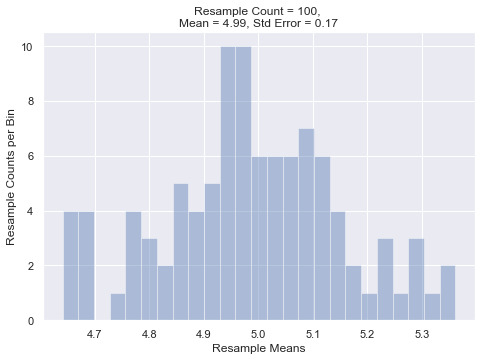

In [64]:
# Bootstrap and Standard Error

sample_data = np.array([ -2.56528602e-01,   1.33537708e+00,   3.10605971e+00,
        -3.88306749e-01,  -3.68273914e-01,   3.27842563e+00,
         1.67486946e+00,  -7.78948772e-01,   1.26512009e+00,
        -7.26835386e-01,  -7.11459507e-01,   7.23924543e-01,
        -3.56656049e+00,  -3.16983567e+00,  -8.24575058e-01,
        -1.70566224e+00,   9.68494665e-01,  -1.45604815e+00,
        -2.44460740e+00,   3.33129754e+00,  -3.15526010e-02,
         5.75056409e-01,  -2.38949637e+00,  -6.08765449e-01,
         7.21845179e-01,  -1.78198715e+00,   1.29139604e+00,
        -6.41277380e-01,  -3.38749959e-03,  -6.03413224e-01,
         4.32455637e+00,   6.13005551e-01,  -1.45542186e+00,
         2.32508982e+00,  -1.74168730e+00,   1.13772719e+00,
        -3.17934025e+00,  -1.89637210e+00,   1.17372247e+00,
         2.27693316e+00,   1.16273656e+00,   6.08703435e-01,
         2.57792609e-01,  -2.07704398e+00,  -5.39688417e-01,
        -1.27754192e-03,   3.05424445e+00,   1.64723658e+00,
        -2.54608031e+00,   1.64816794e+00,   2.49835439e-01,
        -3.13844001e-01,   2.28335258e+00,   3.14199904e+00,
         2.96256024e+00,  -5.58435046e-01,   5.21575248e-01,
         1.82252686e+00,   3.13109025e+00,   2.41651524e-01,
         8.48682047e-01,  -9.72669948e-01,  -1.13241325e+00,
         2.90505164e+00,   4.01248006e+00,   1.17597976e+00,
         3.34706580e+00,   2.08327205e+00,   8.97604908e-02,
         2.12279121e+00,   4.49607313e+00,   1.36834792e+00,
         4.58928731e+00,  -3.75949021e+00,   3.14380501e+00,
         1.69409414e+00,   9.41985299e-01,   1.74352155e+00,
        -2.39513783e+00,   1.16065622e+00,   2.33422514e+00,
         4.59578809e+00,   6.23459563e-01,   6.30127942e-02,
         6.96485913e-01,   3.55080424e+00,   2.39750222e+00,
         7.00479592e-01,   2.80653487e+00,   1.99415510e+00,
         3.75728998e+00,   4.35893812e-01,   1.20467571e+00,
         1.09578369e+00,  -1.02702990e+00,   2.51224055e+00,
         2.46211054e+00,   1.97022691e+00,   1.51082573e+00,
        -8.30741484e-01,   1.17870935e+00,   1.35457097e+00,
         4.55445462e-01,   1.75742858e+00,   2.90810171e+00,
         5.89237180e+00,   2.48915563e+00,   2.67510078e+00,
         2.03110817e+00,  -1.63754243e+00,   2.16697225e+00,
         2.36046042e+00,   7.18648422e+00,   1.89527807e+00,
         2.90309468e+00,   2.25057646e+00,   2.64392476e-03,
         4.64564563e+00,   3.88386607e+00,   3.98206389e+00,
         6.01225090e-01,   5.24558862e+00,  -3.43702126e-01,
         3.65371419e+00,   6.88091125e+00,   5.38927350e-01,
         1.40740454e+00,   2.75930273e+00,   1.57304869e+00,
        -5.01326862e-01,   2.75712595e+00,   5.15392573e-01,
         3.60718486e+00,   8.41151532e-01,   5.79986881e+00,
         1.15349342e+00,   2.09587697e+00,   4.38703443e+00,
         3.18271367e-01,   3.25491987e+00,   5.43428551e+00,
        -3.74966469e-01,   3.22926772e+00,   3.39976559e+00,
         4.46364574e+00,   4.46098578e-01,   2.99086774e-01,
         4.00388313e+00,   3.57396935e+00,   3.50098570e+00,
         3.71289642e+00,   1.67995056e+00,   3.52450739e+00,
         3.66614495e+00,   1.67129716e+00,   6.85154902e+00,
         4.08766584e+00,   7.77393006e-01,   4.49310722e+00,
         1.25063666e+00,   4.79416921e+00,   5.55719116e+00,
         1.61863536e+00,   5.20675226e+00,   4.12556185e+00,
         4.96412032e+00,   7.13358597e+00,   2.86922377e+00,
         1.87252767e+00,   1.62097114e+00,   1.78837943e+00,
         3.28579658e+00,   4.14230395e+00,   4.03338160e+00,
         5.15436650e+00,   3.54600378e+00,   6.44706815e+00,
         3.03068633e+00,   9.02033833e+00,   4.85133470e+00,
         1.90568489e+00,   1.49821500e+00,   4.62494483e+00,
         3.23307443e+00,   5.12800099e+00,   4.66647525e+00,
         3.59434217e+00,   2.06641256e+00,   7.50305551e-01,
         2.90697010e+00,   5.53279759e+00,   4.26818749e+00,
         1.36852244e+00,   4.22636185e+00,   4.67063476e+00,
         2.15228513e+00,   4.24745021e+00,   4.07641744e+00,
         1.69405940e+00,   4.71557472e+00,   5.14156905e+00,
         6.20610249e+00,   6.16760410e+00,   1.32466126e+00,
         2.22434992e+00,   5.15007053e+00,   5.16757190e+00,
         5.19009537e+00,   1.18854630e+01,   5.34178102e+00,
         6.49113128e+00,   6.14800353e+00,   5.56278250e+00,
         3.64946151e+00,   5.81793844e+00,   2.77434957e+00,
         3.86636279e+00,   3.38927290e+00,   4.54374828e+00,
         9.02931713e+00,   6.85469615e-01,   5.81252038e+00,
         1.23456826e+00,   3.53613627e+00,   6.67790119e+00,
         4.64856004e+00,   2.38451044e+00,   3.12939258e+00,
         5.93919550e+00,   3.13926674e+00,   5.05291718e+00,
         4.73114368e+00,   3.35679930e+00,   8.96788818e+00,
         5.96783804e+00,   6.69714827e-01,   5.11290863e+00,
         3.43642707e+00,   6.48486667e+00,   3.21495852e+00,
         4.59052712e+00,   5.84997456e+00,   6.59151039e+00,
         2.47940719e+00,   4.23099753e+00,   3.97010938e+00,
         3.63334153e+00,   8.49090848e+00,   5.78996342e+00,
         2.47823209e+00,   6.85572389e+00,   9.28431239e+00,
         7.12493052e+00,   2.04126007e+00,   4.13153185e+00,
         7.65382230e+00,   3.72466107e+00,   6.04763886e+00,
         6.72926811e+00,   3.34613906e+00,   5.10094929e+00,
        -1.24253468e+00,   3.21122472e+00,   4.77486370e+00,
         2.80443364e+00,   8.58482261e+00,   2.47971724e+00,
         4.47991103e+00,   5.64148115e+00,   8.28254658e+00,
         2.54827570e+00,   7.76632750e+00,   5.48046612e+00,
         3.51698270e+00,   6.42420695e+00,   5.91811939e+00,
         4.33956625e+00,   5.69960417e+00,   4.80937281e+00,
         5.82703469e+00,   6.94426135e+00,   8.81203363e+00,
         3.18436900e+00,   9.94606675e+00,   1.79582440e+00,
         5.41642981e+00,   6.91663441e+00,   6.32198374e+00,
         4.53460096e+00,   5.38375550e+00,   4.83399813e+00,
         4.66127049e+00,   7.55920419e+00,   6.59403097e+00,
         4.51418081e+00,   7.71919975e+00,   6.55459904e+00,
         7.58572424e+00,   7.23925768e+00,   4.34200998e+00,
         4.89963792e+00,   7.53458721e+00,   7.28074053e+00,
         6.03819681e+00,   6.33465477e+00,   8.67532979e+00,
         4.95685722e+00,   7.25419476e+00,   5.77561470e+00,
         5.76463759e+00,   8.41755370e+00,   7.89083270e+00,
         7.88701927e+00,   8.89095761e+00,   6.34200768e+00,
         7.68390594e+00,   5.71946649e+00,   7.00833270e+00,
         6.11971389e+00,   6.59399193e+00,   7.61031405e+00,
         4.80355863e+00,   1.06447746e+01,   4.46796524e+00,
         4.07162277e+00,   8.83622175e+00,   8.12332539e+00,
         7.80823963e+00,   7.83669102e+00,   6.57550645e+00,
         4.82549126e+00,   6.79160912e+00,   5.30567658e+00,
         8.63023947e+00,   6.40588524e+00,   5.06900561e+00,
         6.09722832e+00,   7.58586291e+00,   5.65255089e+00,
         5.15555921e+00,   7.30737442e+00,   7.32993314e+00,
         5.84611365e+00,   5.93792339e+00,   7.36409987e+00,
         4.02383132e+00,   4.12507245e+00,   5.52311156e+00,
         6.55310570e+00,   7.62181513e+00,   9.97071243e+00,
         8.75531925e+00,   6.74012294e+00,   7.04196758e+00,
         5.09494127e+00,   7.08297373e+00,   6.56268272e+00,
         7.80543712e+00,   5.52553811e+00,   8.23869303e+00,
         1.02854778e+01,   7.02247970e+00,   8.06342344e+00,
         8.66028798e+00,   6.49755906e+00,   7.76818496e+00,
         7.36518480e+00,   7.55535220e+00,   5.83398043e+00,
         7.44902035e+00,   8.41599658e+00,   1.03422872e+01,
         9.37854165e+00,   1.17863649e+01,   5.96530487e+00,
         9.26464127e+00,   7.90668401e+00,   1.19396059e+01,
         5.96340343e+00,   5.92055632e+00,   6.42121471e+00,
         3.39220855e+00,   6.60848996e+00,   6.16173468e+00,
         8.00078757e+00,   8.40351195e+00,   1.14923417e+01,
         9.66084768e+00,   6.62619269e+00,   6.00317066e+00,
         8.80383834e+00,   5.19953359e+00,   1.15229175e+01,
         1.02388802e+01,   6.96164870e+00,   4.49373094e+00,
         1.06477447e+01,   7.73092031e+00,   1.04556326e+01,
         4.81114468e+00,   6.82124995e+00,   8.05048740e+00,
         8.15396119e+00,   7.17986906e+00,   9.34569986e+00,
         5.98475914e+00,   7.85524103e+00,   8.40059126e+00,
         9.20887767e+00,   9.62322976e+00,   5.97071582e+00,
         5.17177166e+00,   1.08153536e+01,   8.94462802e+00,
         6.80302693e+00,   1.14223040e+01,   8.57134927e+00,
         1.07185944e+01,   8.51503696e+00,   1.25214958e+01,
         1.19306817e+01,   7.94207170e+00,   1.04031419e+01,
         9.77075190e+00,   1.12372631e+01,   6.59015308e+00,
         9.91210292e+00,   1.06768490e+01,   5.06252103e+00,
         6.23348297e+00,   4.54153564e+00,   8.10118633e+00,
         1.00950845e+01,   1.16847141e+01,   8.84818956e+00,
         1.19772311e+01,   5.97979708e+00,   5.35323512e+00,
         8.66890460e+00,   9.56813090e+00,   8.75461050e+00,
         4.70511580e+00,   8.68175992e+00,   6.27106100e+00,
         1.02393451e+01,   9.65319649e+00,   7.06024043e+00,
         7.93226617e+00,   6.86157296e+00,   8.87464181e+00,
         1.09302846e+01,   7.06854791e+00,   1.00680930e+01,
         8.01948476e+00,   7.51425434e+00,   8.90593928e+00,
         7.06951536e+00,   8.05270139e+00,   6.78424421e+00,
         1.31294503e+01,   9.29052710e+00,   7.84054898e+00,
         9.68795982e+00,   9.05534390e+00,   8.85806080e+00,
         1.05483334e+01,   1.08550154e+01,   8.29899770e+00,
         8.22836352e+00,   8.84989661e+00,   4.81615767e+00,
         6.40961788e+00,   1.21937485e+01,   1.27699354e+01,
         9.00192792e+00,   1.06731139e+01,   1.01625003e+01,
         1.57177616e+01,   1.18191498e+01,   9.34416482e+00,
         7.70891912e+00,   6.42710736e+00,   1.00669273e+01,
         8.16729851e+00,   6.85549258e+00,   8.42685423e+00,
         7.57690399e+00,   1.31342833e+01,   1.15432795e+01,
         9.78405472e+00,   1.27798883e+01,   9.99473662e+00,
         8.13743160e+00,   1.29262482e+01,   1.09778201e+01,
         7.84550769e+00,   9.55932264e+00,   8.20876349e+00,
         7.21440054e+00])

num_resamples = 100
resample_size = 500

#########################################################################################################33

# Use the sample_data as a model for the population
population_model = sample_data

# Resample the population_model 100 times, computing the mean each sample
bootstrap_means = np.zeros(num_resamples)
for nr in range(num_resamples):
    bootstrap_sample = np.random.choice(population_model, size=resample_size, replace=True)
    bootstrap_means[nr] = np.mean(bootstrap_sample)

# Compute and print the mean, stdev of the resample distribution of means
distribution_mean = np.mean(bootstrap_means)
standard_error = np.std(bootstrap_means)
print('Bootstrap Distribution: center={:0.1f}, spread={:0.1f}'.format(distribution_mean, standard_error))

# Plot the bootstrap resample distribution of means
sns.distplot(bootstrap_means, kde=False, bins=25)
plt.title("Resample Count = {}, \nMean = {:0.2f}, Std Error = {:0.2f}".format(len(bootstrap_means), 
                                                                              np.mean(bootstrap_means), 
                                                                              np.std(bootstrap_means)))
plt.xlabel("Resample Means"); plt.ylabel("Resample Counts per Bin")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0); plt.show()

Exercício 11

In [65]:
# Estimating Speed and Confidence

# In this exercise, you goal is to use boot-strap resampling to find the distribution of speed values for a linear model, 
# and then from that distribution, compute the best estimate for the speed and the 90th percent confidence interval of that 
# estimate. The speed here is the slope parameter from the linear regression model to fit distance as a function of time.

# To get you started, we've preloaded distance and time data, together with a pre-defined least_squares() function to
# compute the speed value for each resample.

def least_squares(x, y):
    x_mean = np.sum(x)/len(x)
    y_mean = np.sum(y)/len(y)
    x_dev = x - x_mean
    y_dev = y - y_mean
    a1 = np.sum(x_dev * y_dev) / np.sum( np.square(x_dev) )
    a0 = y_mean - (a1 * x_mean)
    return a0, a1

resample_speeds = np.zeros(1000)

distances = hiking['distance']
times = hiking['time']
###########################################################################################

# Resample each preloaded population, and compute speed distribution
population_inds = np.arange(0, 99, dtype=int)

for nr in range(num_resamples):
    sample_inds = np.random.choice(population_inds, size=100, replace=True)
    sample_inds.sort()
    sample_distances = distances[sample_inds]
    sample_times = times[sample_inds]
    a0, a1 = least_squares(sample_times, sample_distances)
    resample_speeds[nr] = a1

# Compute effect size and confidence interval, and print
speed_estimate = np.mean(resample_speeds)
ci_90 = np.percentile(resample_speeds, [5, 95])
print('Speed Estimate = {:0.2f}, 90% Confidence Interval: {:0.2f}, {:0.2f} '.format(speed_estimate, ci_90[0], ci_90[1]))

print("""\nNotice that the speed estimate (the mean) falls inside the confidence interval (the 5th and 95th percentiles). 
Moreover, notice if you computed the standard error, it would also fit inside the confidence interval. Think of the
standard error here as the 'one sigma' confidence interval. Note that this should be very similar to the summary output 
of a statsmodels ols() linear regression model, but here you can compute arbitrary percentiles because you have the entire
speeds distribution.""")

Speed Estimate = 0.21, 90% Confidence Interval: 0.00, 2.05 

Notice that the speed estimate (the mean) falls inside the confidence interval (the 5th and 95th percentiles). 
Moreover, notice if you computed the standard error, it would also fit inside the confidence interval. Think of the
standard error here as the 'one sigma' confidence interval. Note that this should be very similar to the summary output 
of a statsmodels ols() linear regression model, but here you can compute arbitrary percentiles because you have the entire
speeds distribution.


Exercício 12

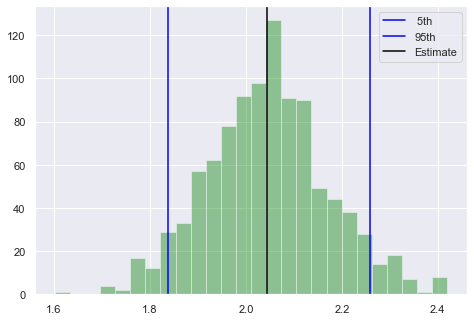

In [66]:
# Visualize the Bootstrap

def compute_resample_speeds(distances, times):
    num_resamples = 1000
    population_inds = np.arange(0, 99, dtype=int)
    resample_speeds = np.zeros(num_resamples)
    for nr in range(num_resamples):
        sample_inds = np.random.choice(population_inds, size=100, replace=True)
        sample_inds.sort()
        sample_distances = distances[sample_inds]
        sample_times = times[sample_inds]
        a0, a1 = least_squares(sample_times, sample_distances)
        resample_speeds[nr] = a1        
    return resample_speeds

###########################################################################33

# Create the bootstrap distribution of speeds
resample_speeds = compute_resample_speeds(distances, times)
speed_estimate = np.mean(resample_speeds)
percentiles = np.percentile(resample_speeds, [5, 95])

# Plot the histogram with the estimate and confidence interval
sns.distplot(resample_speeds, kde=False, color='green')
plt.axvline(percentiles[0], label=' 5th', color='blue'); plt.axvline(percentiles[1], label='95th', color='blue')
plt.axvline(speed_estimate, label='Estimate', color='black'); plt.legend()
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0); plt.show()


#### Exercício 13 - Model Errors and Randomness

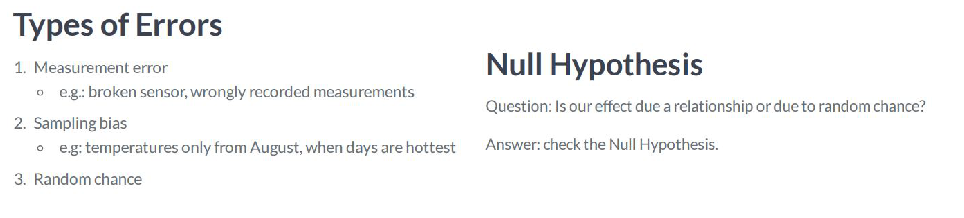

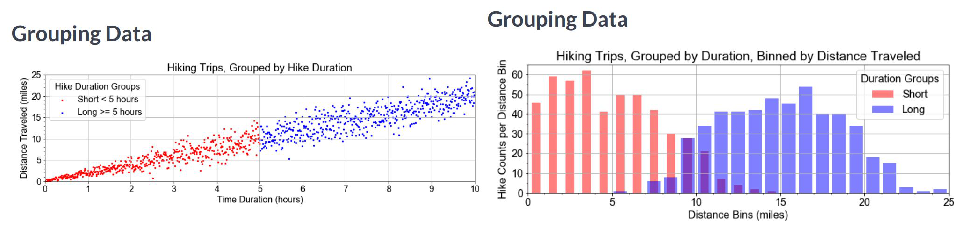

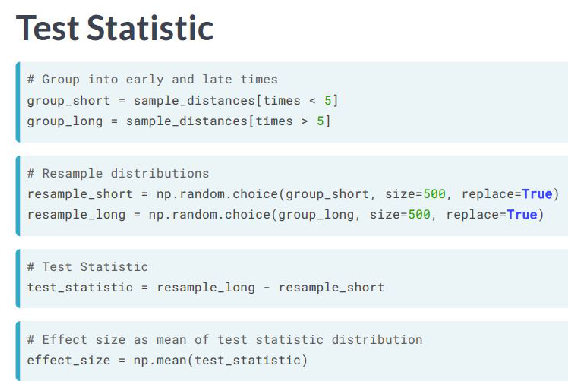

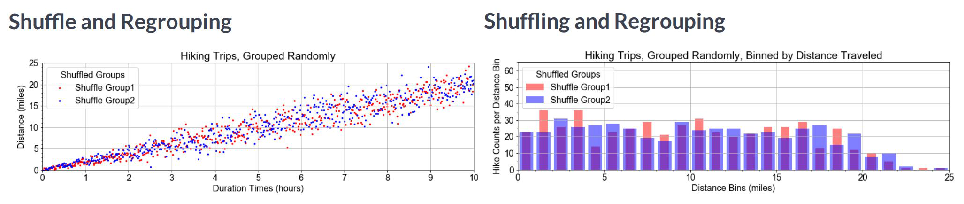

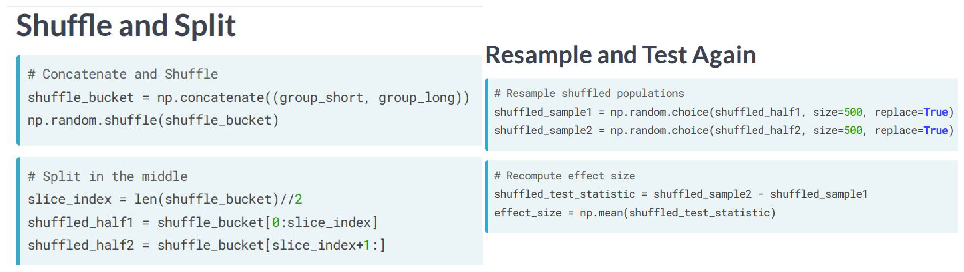

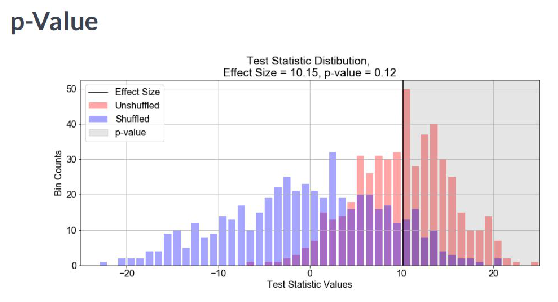

In [67]:
#vídeo

plot_2('types_errors', 'test_random_error'); print("="*120); plot_2('grouping_data', 'grouping_data_2')
plot_1('test_statistic', right=1.7, bottom=-0.3); plot_2('shuffle', 'shuffle_2')
plot_2('shuffle_split', 'resample_test'); plot_1('p_value', right=1.6)

Exercício 14

Test Statistic: mean=10.50, stdev=4.81


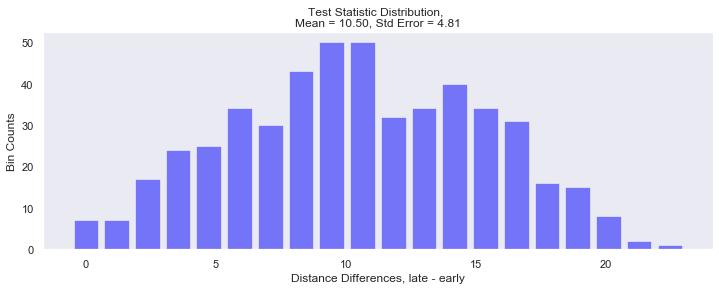

Notice again, the test statistic is the difference between a distance drawn from short duration trips and one 
drawn from long duration trips. The distribution of difference values is built up from differencing each point in the early 
time range with one from the late time range. The mean of the test statistic is not zero and tells us that there is on
average a difference in distance traveled when comparing short and long duration trips. Again, we call this the 
'effect size'. The time increase had an effect on distance traveled. The standard error of the test statistic distribution
is not zero, so there is some spread in that distribution, or put another way, uncertainty in the size of the effect.


In [68]:
# Test Statistics and Effect Size

sample_distances = distances; sample_times = times

def plot_test_statistic(test_statistic):
    """
    Purpose: Plot the test statistic array as a histogram
    Args:
        test_statistic (np.array): an array of test statistic values, e.g. resample2 - resample1
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    t_mean = np.mean(test_statistic)
    t_std = np.std(test_statistic)
    t_min = np.min(test_statistic)
    t_max = np.max(test_statistic)
    bin_edges = np.linspace(t_min, t_max, 21)
    data_opts = dict(rwidth=0.8, color='blue', alpha=0.5)
    fig, axis = plt.subplots(figsize=(12,4))
    plt.hist(test_statistic, bins=bin_edges, **data_opts)
    axis.grid()
    axis.set_ylabel("Bin Counts")
    axis.set_xlabel("Distance Differences, late - early")
    title_form = "Test Statistic Distribution, \nMean = {:0.2f}, Std Error = {:0.2f}"
    axis.set_title(title_form.format(t_mean, t_std))
    plt.show()
    return fig

################3

# Create two poulations, sample_distances for early and late sample_times.
# Then resample with replacement, taking 500 random draws from each population.
group_duration_short = sample_distances[sample_times < 5]
group_duration_long = sample_distances[sample_times > 5]
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)

# Difference the resamples to compute a test statistic distribution, then compute its mean and stdev
test_statistic = resample_long - resample_short
effect_size = np.mean(test_statistic)
standard_error = np.std(test_statistic)

# Print and plot the results
print('Test Statistic: mean={:0.2f}, stdev={:0.2f}'.format(effect_size, standard_error))
fig = plot_test_statistic(test_statistic)

print("""Notice again, the test statistic is the difference between a distance drawn from short duration trips and one 
drawn from long duration trips. The distribution of difference values is built up from differencing each point in the early 
time range with one from the late time range. The mean of the test statistic is not zero and tells us that there is on
average a difference in distance traveled when comparing short and long duration trips. Again, we call this the 
'effect size'. The time increase had an effect on distance traveled. The standard error of the test statistic distribution
is not zero, so there is some spread in that distribution, or put another way, uncertainty in the size of the effect.""")

Exercício 15

In [69]:
# Null Hypothesis

print("""The Null Hypothesis is: short and long time durations have no effect on total distance traveled.\n""")

# Shuffle the time-ordered distances, then slice the result into two populations.
shuffle_bucket = np.concatenate((group_duration_short, group_duration_long))
np.random.shuffle(shuffle_bucket)
slice_index = len(shuffle_bucket)//2
shuffled_half1 = shuffle_bucket[0:slice_index]
shuffled_half2 = shuffle_bucket[slice_index:]

# Create new samples from each shuffled population, and compute the test statistic
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic = resample_half2 - resample_half1

# Compute and print the effect size
effect_size = np.mean(test_statistic)
print('Test Statistic, after shuffling, mean = {}'.format(effect_size))

print("""\nNotice that your effect size is not exactly zero because there is noise in the data. But the effect size is much
closer to zero than before shuffling. Notice that if you rerun your code, which will generate a new shuffle, you will get
slightly different results each time for the effect size, but np.abs(test_statistic) should be less than about 1.0, due to
the noise, as opposed to the slope, which was about 2.0.""")

The Null Hypothesis is: short and long time durations have no effect on total distance traveled.

Test Statistic, after shuffling, mean = 0.3251982731633185

Notice that your effect size is not exactly zero because there is noise in the data. But the effect size is much
closer to zero than before shuffling. Notice that if you rerun your code, which will generate a new shuffle, you will get
slightly different results each time for the effect size, but np.abs(test_statistic) should be less than about 1.0, due to
the noise, as opposed to the slope, which was about 2.0.


Exercício 16

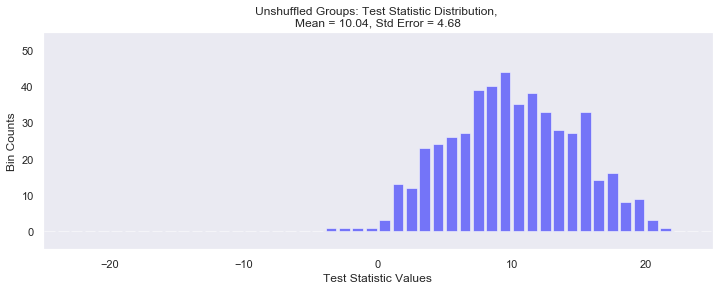

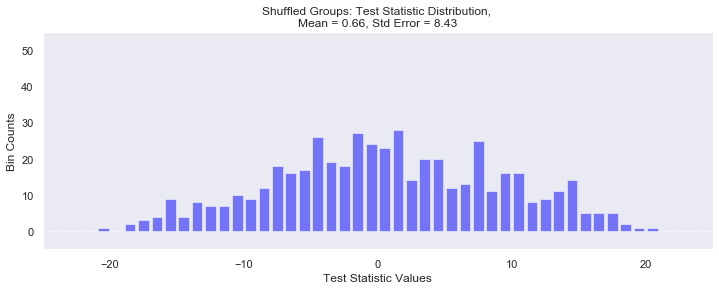

Notice that after you shuffle, the effect size went almost to zero and the spread increased, as measured by the 
standard deviation of the sample statistic, aka the 'standard error'. So shuffling did indeed have an effect.
The null hypothesis is disproven. Time ordering does in fact have a non-zero effect on distance traveled. 
Distance is correlated to time.


In [70]:
# Visualizing Test Statistics

def shuffle_and_split(sample1, sample2):
    shuffled = np.concatenate((sample1, sample2))
    np.random.shuffle( shuffled )
    half_length = len(shuffled)//2
    sample1 = shuffled[0:half_length]
    sample2 = shuffled[half_length+1:]
    return sample1, sample2

def plot_test_statistic(test_statistic, label=''):
    """
    Purpose: Plot the test statistic array as a histogram
    Args:
        test_statistic (np.array): an array of test statistic values, e.g. resample2 - resample1
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    t_mean = np.mean(test_statistic)
    t_std = np.std(test_statistic)
    t_min = np.min(test_statistic)
    t_max = np.max(test_statistic)
    # bin_edges = np.linspace(t_min, t_max, 21)
    bin_edges = np.linspace(-25, 25, 51)
    data_opts = dict(rwidth=0.8, color='blue', alpha=0.5)
    fig, axis = plt.subplots(figsize=(12,4))
    plt.hist(test_statistic, bins=bin_edges, **data_opts)
    axis.grid()
    axis.set_ylim(-5, +55)
    axis.set_xlim(-25, +25)
    axis.set_ylabel("Bin Counts")
    axis.set_xlabel("Test Statistic Values".format(label))
    title_form = "{} Groups: Test Statistic Distribution, \nMean = {:0.2f}, Std Error = {:0.2f}"
    axis.set_title(title_form.format(label, t_mean, t_std))
    plt.show()
    return fig

##############################################################################

# From the unshuffled groups, compute the test statistic distribution
resample_short = np.random.choice(group_duration_short, size=500, replace=True)
resample_long = np.random.choice(group_duration_long, size=500, replace=True)
test_statistic_unshuffled = resample_long - resample_short

# Shuffle two populations, cut in half, and recompute the test statistic
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
resample_half1 = np.random.choice(shuffled_half1, size=500, replace=True)
resample_half2 = np.random.choice(shuffled_half2, size=500, replace=True)
test_statistic_shuffled = resample_half2 - resample_half1

# Plot both the unshuffled and shuffled results and compare
fig = plot_test_statistic(test_statistic_unshuffled, label='Unshuffled')
fig = plot_test_statistic(test_statistic_shuffled, label='Shuffled')

print("""Notice that after you shuffle, the effect size went almost to zero and the spread increased, as measured by the 
standard deviation of the sample statistic, aka the 'standard error'. So shuffling did indeed have an effect.
The null hypothesis is disproven. Time ordering does in fact have a non-zero effect on distance traveled. 
Distance is correlated to time.""")

Exercício 17

The p-value is = 0.114


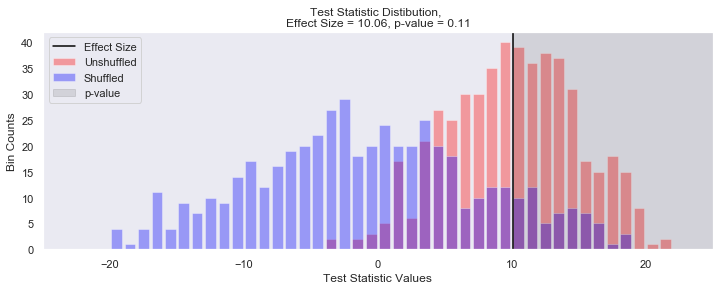

Note that the entire point of this is compute a p-value to quantify the chance that our estimate for speed could 
have been obtained by random chance. 

On the plot, the unshuffle test stats are the distribution of speed values estimated from time-ordered distances. 
The shuffled test stats are the distribution of speed values computed from randomizing unordered distances. Values of the
shuffled stats to the right of the mean non-shuffled effect size line are those that both 
(1) could have both occured randomly and 
(2) are at least as big as the estimate you want to use for speed.


In [71]:
# Visualizing the P-Value

# In this exercise, you will visualize the p-value, the chance that the effect (or "speed") we estimated, was the result of
# random variation in the sample. Your goal is to visualize this as the fraction of points in the shuffled test statistic
# distribution that fall to the right of the mean of the test statistic ("effect size") computed from the unshuffled 
# samples.

def compute_test_statistic(sample1, sample2):
    resample1 = np.random.choice(sample1, size=500, replace=True)
    resample2 = np.random.choice(sample2, size=500, replace=True)
    test_statistic = resample2 - resample1
    return test_statistic

def plot_test_stats_and_pvalue(test_statistic, shuffle_statistic):
    """
    Purpose: Plot the test statistic array as a histogram
    Args:
        test_statistic (np.array): an array of test statistic values, e.g. resample2 - resample1
        shuffle_statistic (np.array): an array of test statistic values, from shuffled resamples
    Returns:
        fig (plt.figure): matplotlib figure object
    """
    t_mean = np.mean(test_statistic)
    t_std = np.std(test_statistic)
    t_min = np.min(test_statistic)
    t_max = np.max(test_statistic)
    effect_size = np.mean(test_statistic)
    p_value = len(shuffle_statistic[shuffle_statistic>=effect_size])/len(shuffle_statistic)
    # bin_edges = np.linspace(t_min, t_max, 21)
    bin_edges = np.linspace(-25, 25, 51)
    shuffle_opts = dict(rwidth=0.8, color='blue', alpha=0.35, label='Shuffled')
    test_opts = dict(rwidth=0.8, color='red', alpha=0.35, label='Unshuffled')
    fig, axis = plt.subplots(figsize=(12,4))
    plt.hist(test_statistic, bins=bin_edges, **test_opts)
    plt.hist(shuffle_statistic, bins=bin_edges, **shuffle_opts)
    axis.axvline(effect_size, color='black', label='Effect Size')
    axis.axvspan(effect_size, +25, alpha=0.10, color='black', label='p-value')
    axis.grid()
    # axis.set_ylim(-5, +55)
    axis.set_xlim(-25, +25)
    axis.set_ylabel("Bin Counts")
    axis.set_xlabel("Test Statistic Values")
    title_form = ("Test Statistic Distibution, \n"
                  "Effect Size = {:0.2f}, p-value = {:0.02f}")
    axis.set_title(title_form.format(effect_size, p_value))
    axis.legend(loc='upper left')
    plt.show()
    return fig

####################################################################################

# Compute the test stat distribution and effect size for two population groups
test_statistic_unshuffled = compute_test_statistic(group_duration_short, group_duration_long)
effect_size = np.mean(test_statistic_unshuffled)

# Randomize the two populations, and recompute the test stat distribution
shuffled_half1, shuffled_half2 = shuffle_and_split(group_duration_short, group_duration_long)
test_statistic_shuffled = compute_test_statistic(shuffled_half1, shuffled_half2)

# Compute the p-value as the proportion of shuffled test stat values >= the effect size
condition = test_statistic_shuffled >= effect_size
p_value = len(test_statistic_shuffled[condition]) / len(test_statistic_shuffled)

# Print p-value and overplot the shuffled and unshuffled test statistic distributions
print("The p-value is = {}".format(p_value))
fig = plot_test_stats_and_pvalue(test_statistic_unshuffled, test_statistic_shuffled)

print("""Note that the entire point of this is compute a p-value to quantify the chance that our estimate for speed could 
have been obtained by random chance. 

On the plot, the unshuffle test stats are the distribution of speed values estimated from time-ordered distances. 
The shuffled test stats are the distribution of speed values computed from randomizing unordered distances. Values of the
shuffled stats to the right of the mean non-shuffled effect size line are those that both 
(1) could have both occured randomly and 
(2) are at least as big as the estimate you want to use for speed.""")

#### Exercício 18 - end

In [72]:
#vídeo

# Fim